# General Findings

## Results for the LCA comparison from A1-A5 without separation in the life cycle stages

## Input Parameters

- Monte Carlo Simulations = 1000
- Foreground data as described in Chapter 5 (Case Study)
- background data is the one from the beginning

### Import Packages and Functions

In [ ]:
## import necessary packages, calculators, data

from calculator.do_probabilistic_lca_calculator import DesignOptionProbabilisticLCACalculator
from calculator.deterministic_calculator import LCACalculator
from general.generate_designs import create_layers, create_design_options, create_emission_factors
from general.load_input import load_data
from visualizations.old_visualizations import plot_overall_lca_distributions
from general.statistical_results import calculate_statistical_parameters, display_statistical_table, convert_statistical_data_to_table, calculate_statistical_parameters_life_cycle_stages, convert_statistical_data_to_table_life_cycle_stages
from visualizations.do_visualizations import prepare_boxplot_data, create_boxplots_from_raw_data, plot_heatmaps, plot_gwp_boxplots_aggregated, plot_lca_distributions_by_design_option, plot_violin, plot_kde_distributions_by_stage, plot_stage_specific_boxplots
from contribution_analysis import calculate_normalized_a1_contributions_multiple_emission_factors, plot_comparison_a1_contributions, calculate_uncertainty_contributions, plot_comparison_uncertainty_contributions

import pandas as pd
import numpy as np

### Load Data

In [2]:
## load data

layers_data, emission_factors_data, design_options_data = load_data(
    "/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/layers.json",
    ["/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/ecoinvent_background_data.json", "/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/national_background_data.json", "/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/epd_background_data.json"],
    "/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/design_options.json"
)

### Generate necessary instances

In [3]:
## generate instances of layers, design options and emission factors

layers = create_layers(layers_data)
emission_factors_ecoinvent = create_emission_factors(emission_factors_data[0])
emission_factors_national = create_emission_factors(emission_factors_data[1])
emission_factors_epd = create_emission_factors(emission_factors_data[2])
design_options = create_design_options(layers, design_options_data)

### Calculation of Deterministic LCA results

In [4]:
## calculate deterministic results for the databases

## Deterministic LCA on layer level and design option level - ECOINVENT
deterministic_lca_calculator_ecoinvent = LCACalculator(layers, emission_factors_ecoinvent)
deterministic_lca_calculator_ecoinvent.calculate_stage_impacts()
deterministic_layer_results_ecoinvent = deterministic_lca_calculator_ecoinvent.get_results()
deterministic_design_option_results_ecoinvent= deterministic_lca_calculator_ecoinvent.calculate_deterministic_lca_design_option(deterministic_layer_results_ecoinvent, design_options, length_road=3.39)

## Deterministic LCA on layer level and design option level - ÖKOBAUDAT
deterministic_lca_calculator_national = LCACalculator(layers, emission_factors_national)
deterministic_lca_calculator_national.calculate_stage_impacts()
deterministic_layer_results_national = deterministic_lca_calculator_national.get_results()
deterministic_design_option_results_national = deterministic_lca_calculator_national.calculate_deterministic_lca_design_option(deterministic_layer_results_national, design_options, length_road=3.39)

## Deterministic LCA on layer level and design option level - EPD
deterministic_lca_calculator_epd = LCACalculator(layers, emission_factors_epd)
deterministic_lca_calculator_epd.calculate_stage_impacts()
deterministic_layer_results_epd = deterministic_lca_calculator_epd.get_results()
deterministic_design_option_results_epd = deterministic_lca_calculator_epd.calculate_deterministic_lca_design_option(deterministic_layer_results_epd, design_options, length_road=3.39)

### Calculation of Probabilistic LCA results

In [5]:
## calculate probabilistic results for the databases

## change the Monte Carlo Simulations here!!

## Probabilistic LCA on design option level - ECOINVENT
do_probabilistic_lca_calculator_ecoinvent = DesignOptionProbabilisticLCACalculator(layers=layers, emission_factors=emission_factors_ecoinvent, design_options=design_options, length_road=3.39)
probabilistic_results_ecoinvent = do_probabilistic_lca_calculator_ecoinvent.calculate_do_probabilistic_impact(n_samples=1000)
aggregated_results_ecoinvent = do_probabilistic_lca_calculator_ecoinvent.collect_aggregated_data(probabilistic_results_ecoinvent)
full_results_ecoinvent = do_probabilistic_lca_calculator_ecoinvent.collect_overall_aggregated_data(probabilistic_results_ecoinvent)

## Probabilistic LCA on design option level - ÖKOBAUDAT == NATIONAL
do_probabilistic_lca_calculator_national = DesignOptionProbabilisticLCACalculator(layers=layers, emission_factors=emission_factors_national, design_options=design_options, length_road=3.39)
probabilistic_results_national = do_probabilistic_lca_calculator_national.calculate_do_probabilistic_impact(n_samples=1000)
aggregated_results_national = do_probabilistic_lca_calculator_national.collect_aggregated_data(probabilistic_results_national)
full_results_national = do_probabilistic_lca_calculator_national.collect_overall_aggregated_data(probabilistic_results_national)

## Probabilistic LCA on design option level - EPD
do_probabilistic_lca_calculator_epd = DesignOptionProbabilisticLCACalculator(layers=layers, emission_factors=emission_factors_epd, design_options=design_options, length_road=3.39)
probabilistic_results_epd = do_probabilistic_lca_calculator_epd.calculate_do_probabilistic_impact(n_samples=1000)
aggregated_results_epd = do_probabilistic_lca_calculator_epd.collect_aggregated_data(probabilistic_results_epd)
full_results_epd = do_probabilistic_lca_calculator_epd.collect_overall_aggregated_data(probabilistic_results_epd)

full_results = [full_results_ecoinvent, full_results_national, full_results_epd]

Calculating probabilistic LCA for Design Option: base_design
Calculating probabilistic LCA for Design Option: alternative_design1
Calculating probabilistic LCA for Design Option: alternative_design2
Calculating probabilistic LCA for Design Option: base_design
Calculating probabilistic LCA for Design Option: alternative_design1
Calculating probabilistic LCA for Design Option: alternative_design2
Calculating probabilistic LCA for Design Option: base_design
Calculating probabilistic LCA for Design Option: alternative_design1
Calculating probabilistic LCA for Design Option: alternative_design2


### Boxplots

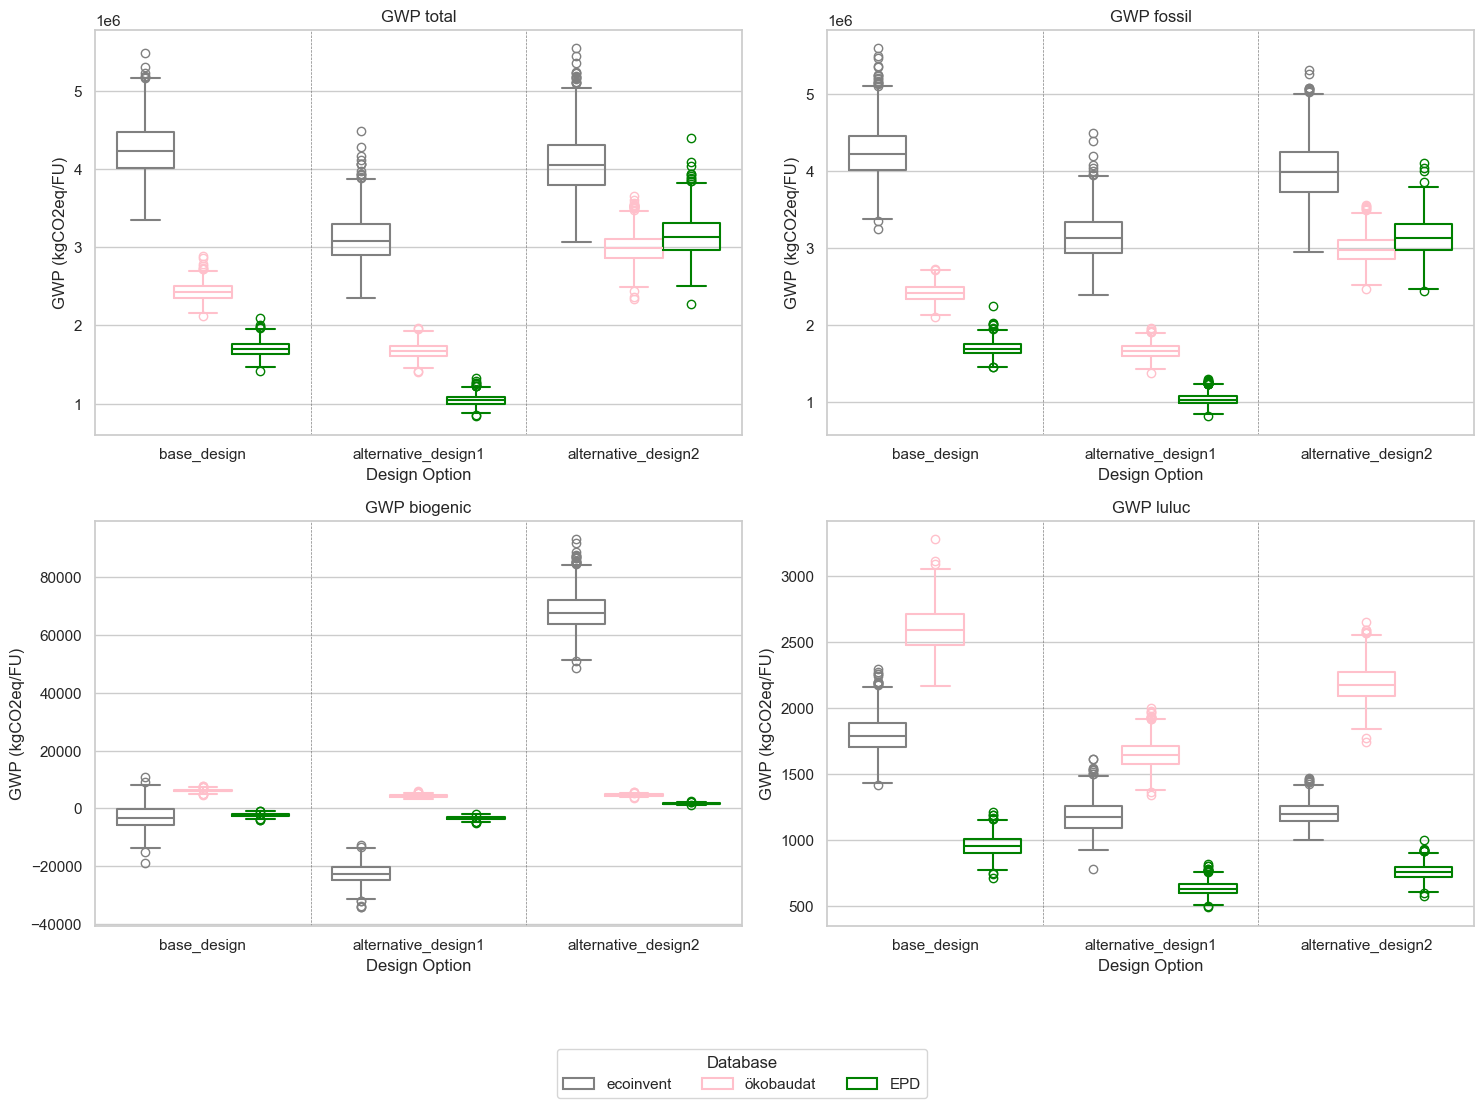

In [6]:
## create overall boxplots for the comparison of the databases for multiple design options

boxplot_data_ecoinvent = prepare_boxplot_data(full_results_ecoinvent, 'ecoinvent')
boxplot_data_national = prepare_boxplot_data(full_results_national, 'ökobaudat')
boxplot_data_epd = prepare_boxplot_data(full_results_epd, 'EPD')
boxplot_data = pd.concat([boxplot_data_ecoinvent, boxplot_data_national, boxplot_data_epd], ignore_index=True)
create_boxplots_from_raw_data(boxplot_data)

### Distribution Functions

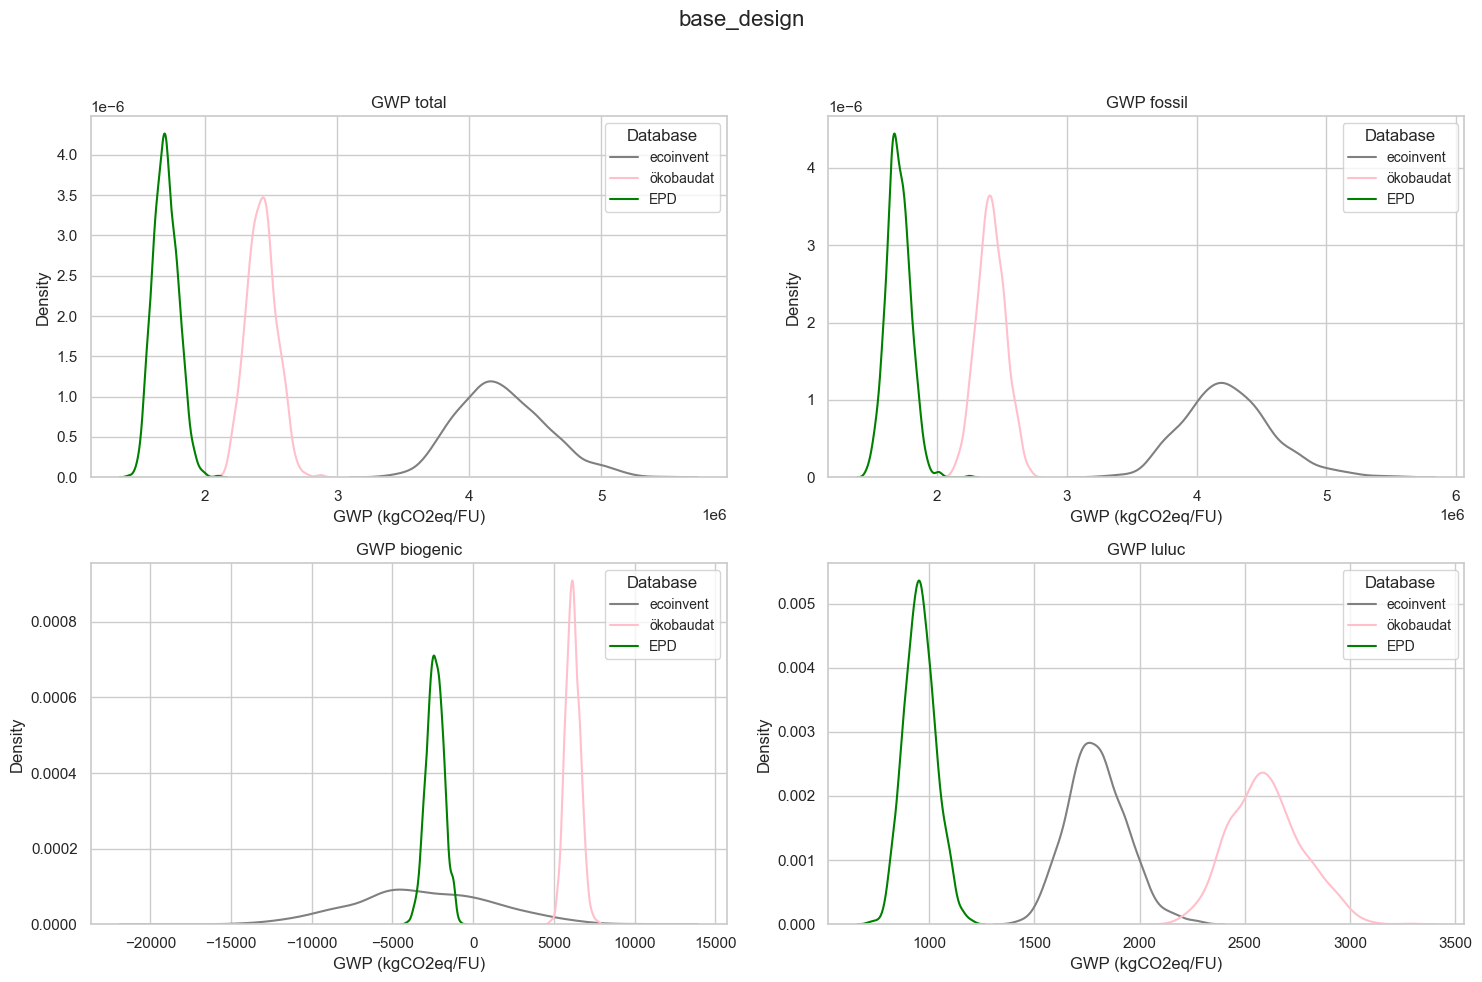

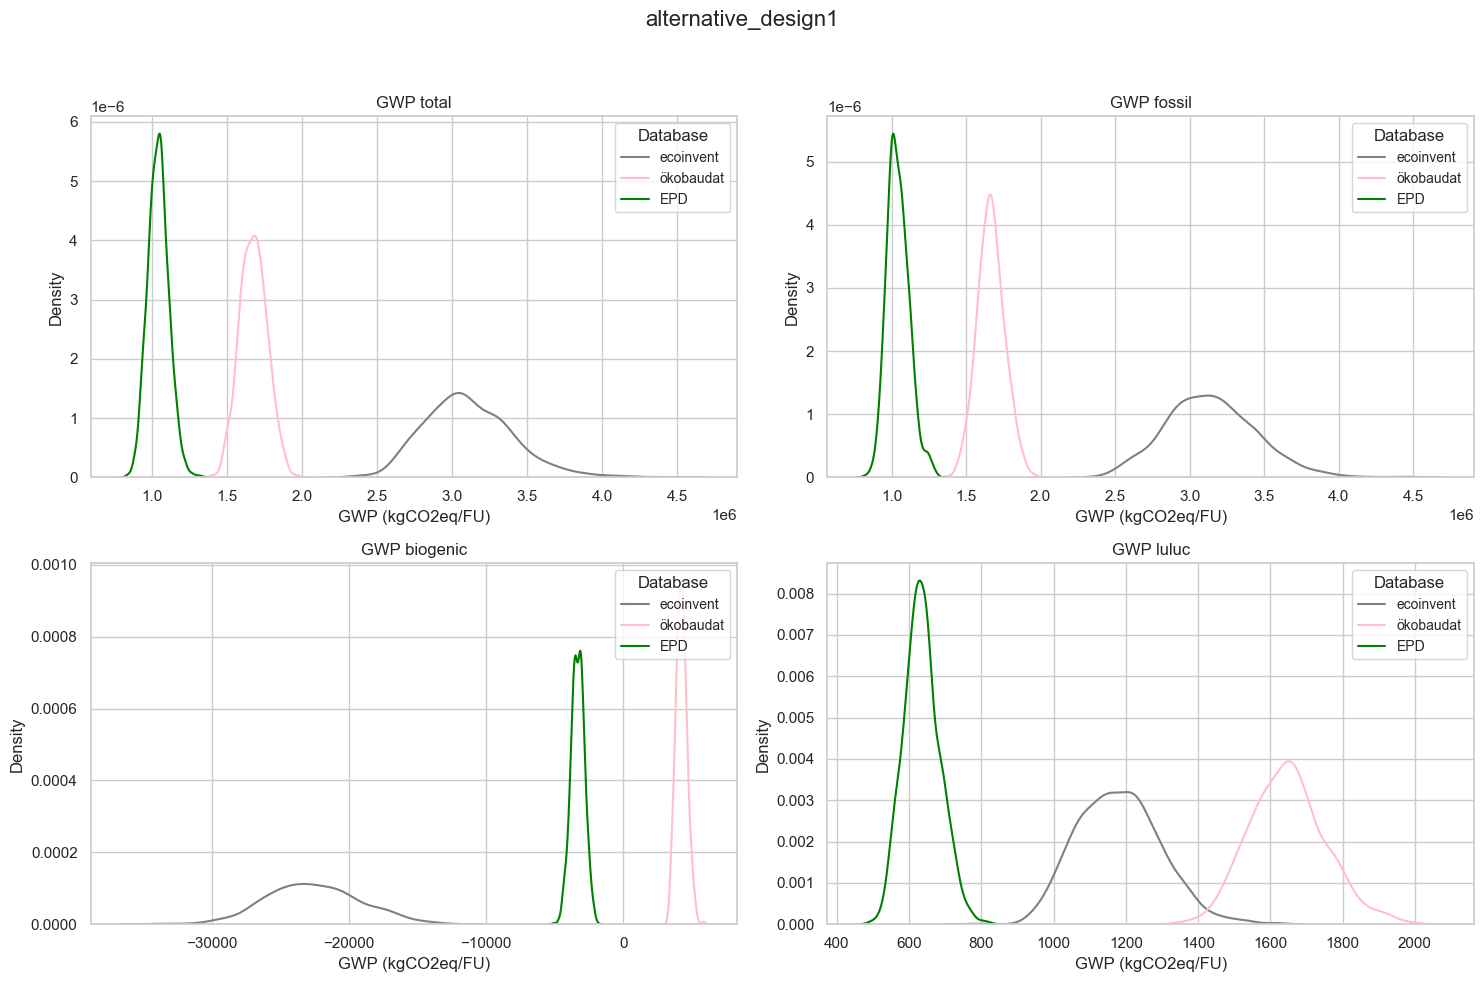

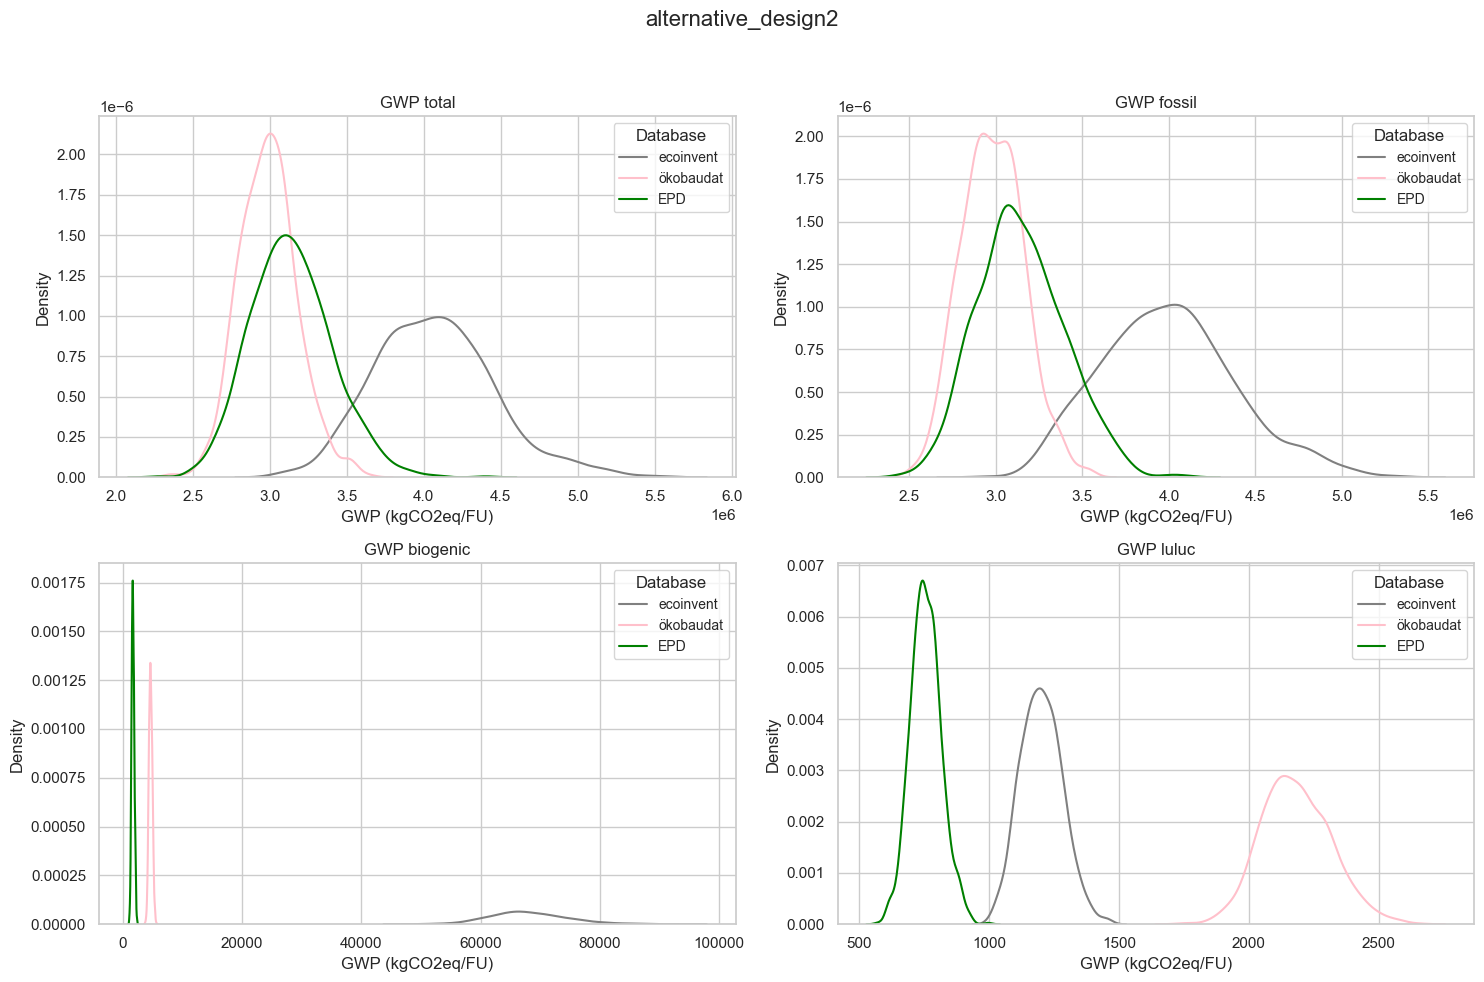

In [7]:
## create overall distribution functions for the design options

plot_lca_distributions_by_design_option(full_results=full_results)

### Violin Plots 

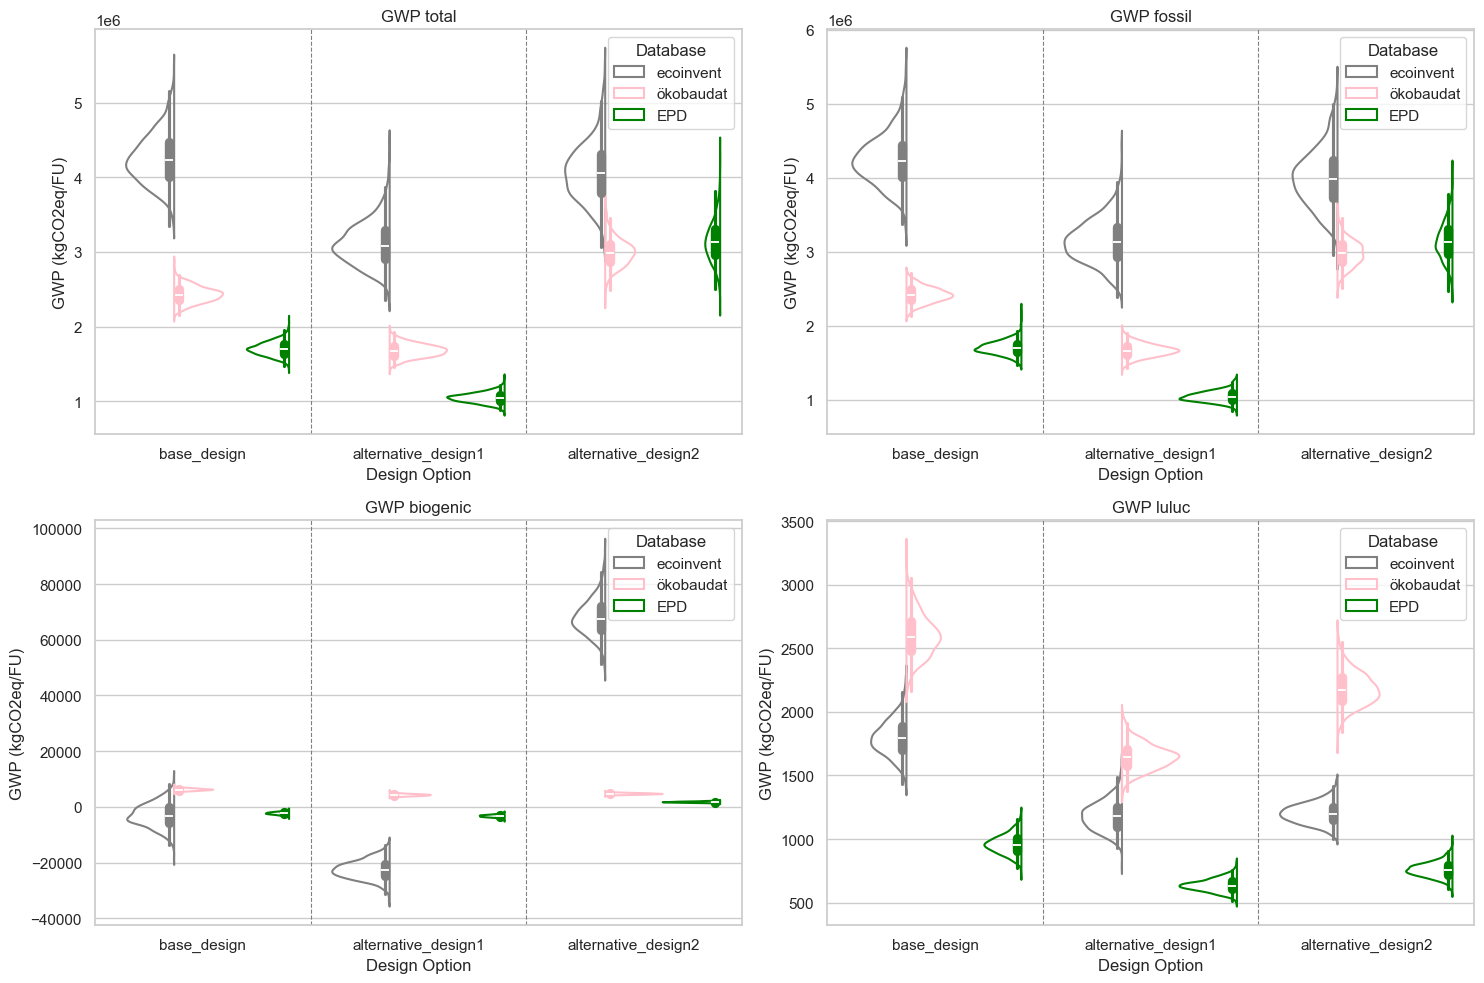

In [8]:
## use the same data to create violin plots for the comparison of the databases for multiple design options

violin_data = boxplot_data
plot_violin(violin_data)

### Calculate Statistical Parameters 

In [9]:
## calculation of statistical parameters of the probabilistic LCA results

ecoinvent_parameters = calculate_statistical_parameters(full_results_ecoinvent)
national_parameters = calculate_statistical_parameters(full_results_national)
epd_parameters = calculate_statistical_parameters(full_results_epd)

df_ecoinvent = convert_statistical_data_to_table(ecoinvent_parameters, 'ecoinvent')
df_national = convert_statistical_data_to_table(national_parameters, 'oekobaudat')
df_epd = convert_statistical_data_to_table(epd_parameters, 'EPD')

statistical_data = pd.concat([df_ecoinvent, df_national, df_epd], ignore_index=True)

## be aware of changing the name of the csv to the number of Monte Carlo runs, if using 
statistical_data.to_csv('statistical_results_N=1000.csv', index=False)

### Visualization of the Heatmap

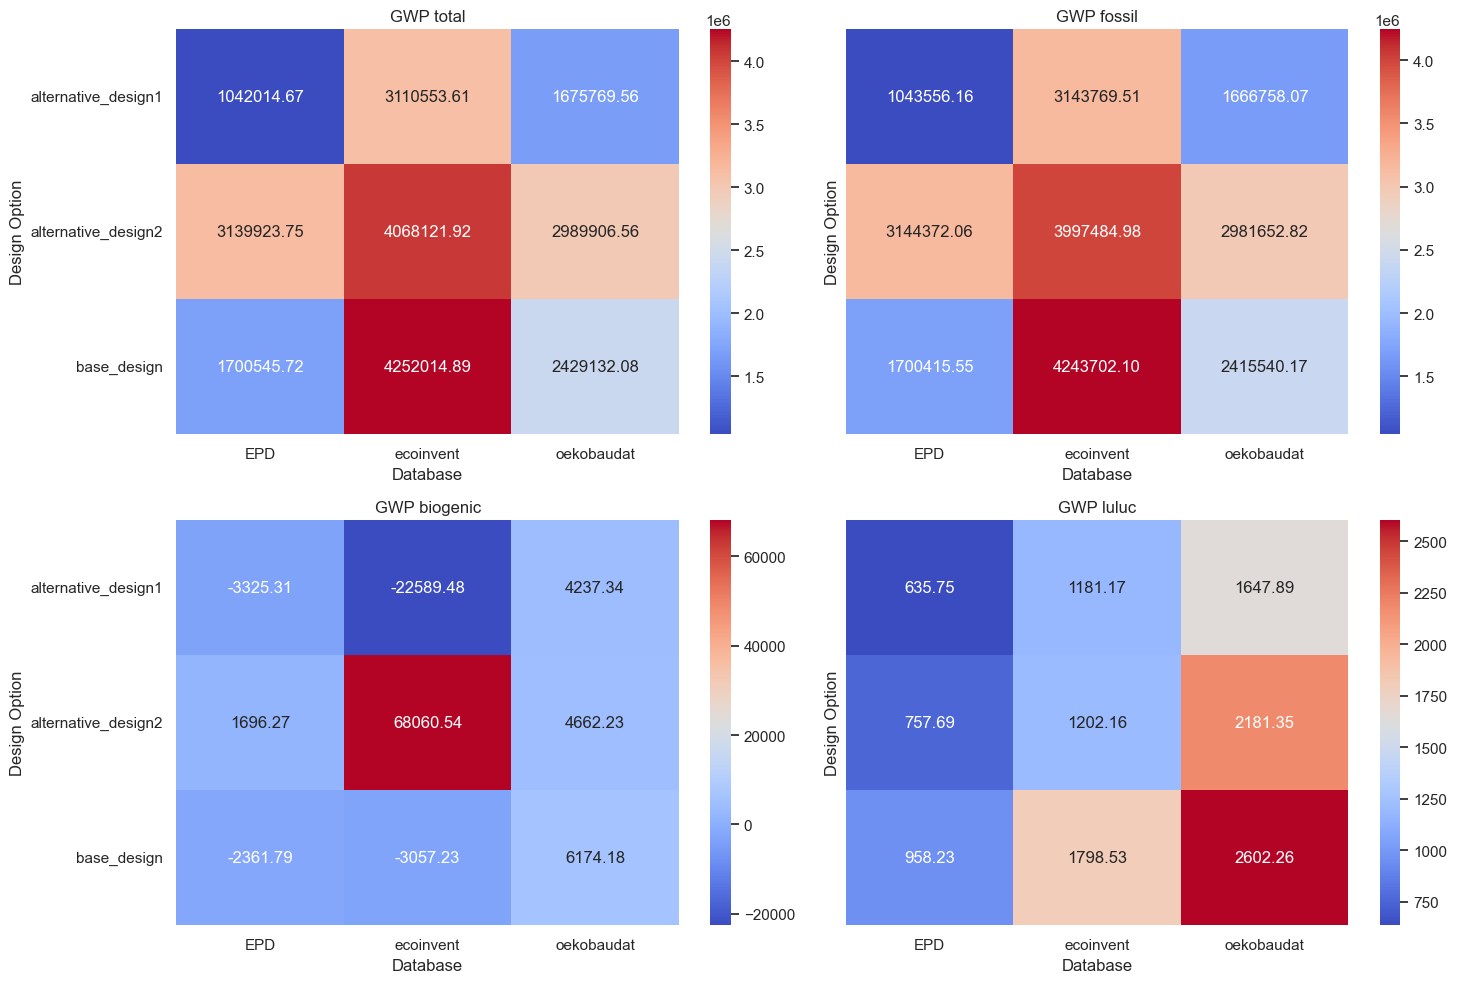

In [10]:
## visualize heatmap 

plot_heatmaps(statistical_data)

## Results for the LCA comparison from A1-A5 with separation in the life cycle stages

[{'base_design': {'A1': {'gwp_total': [2623762.772784295, 2690299.5780194416, 2873459.7299573645, 2682227.424666658, 2657183.0597738274, 3157251.0052863276, 3099473.3939213427, 2579211.9044026276, 3428191.6542489617, 3099579.7441355293, 2752595.702857959, 2971615.7513378765, 2335848.6672866293, 2955307.055032123, 2719805.7156549734, 2675331.117828067, 2976178.16392917, 2887684.534838343, 2874427.869796669, 2940694.0474854275, 2853207.5856232177, 3346715.189197098, 3059778.349555949, 3387985.3181810793, 3161721.1471817316, 2866511.534590792, 3085482.4977085604, 3411313.3465189403, 2815070.2878214284, 2865129.990980694, 2469672.9889338603, 2563634.5518560885, 2622678.9816908957, 2837584.466421461, 2910626.425109652, 3258116.390694979, 3386089.1768664545, 3431594.7575804493, 2966959.7988614263, 2854018.747760036, 3194615.648708497, 3037884.614740813, 3086586.130531611, 2861654.4861770263, 3012624.7676117104, 3019083.983771955, 2535802.2729813857, 3356422.7380419234, 3732195.48159527, 3373

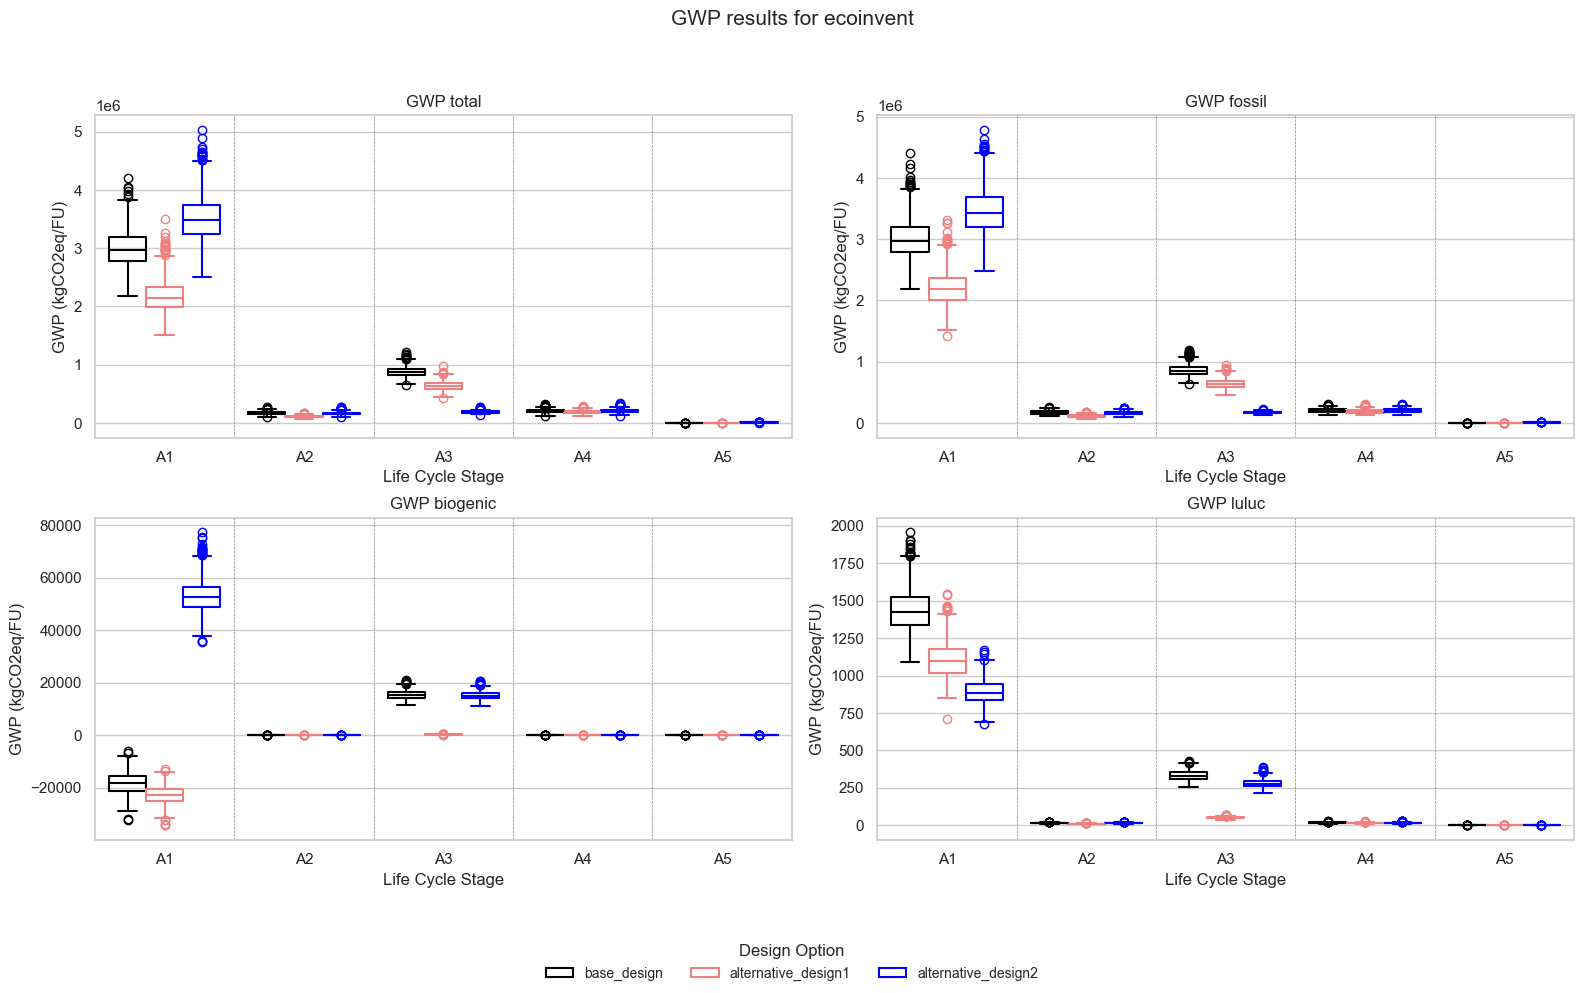

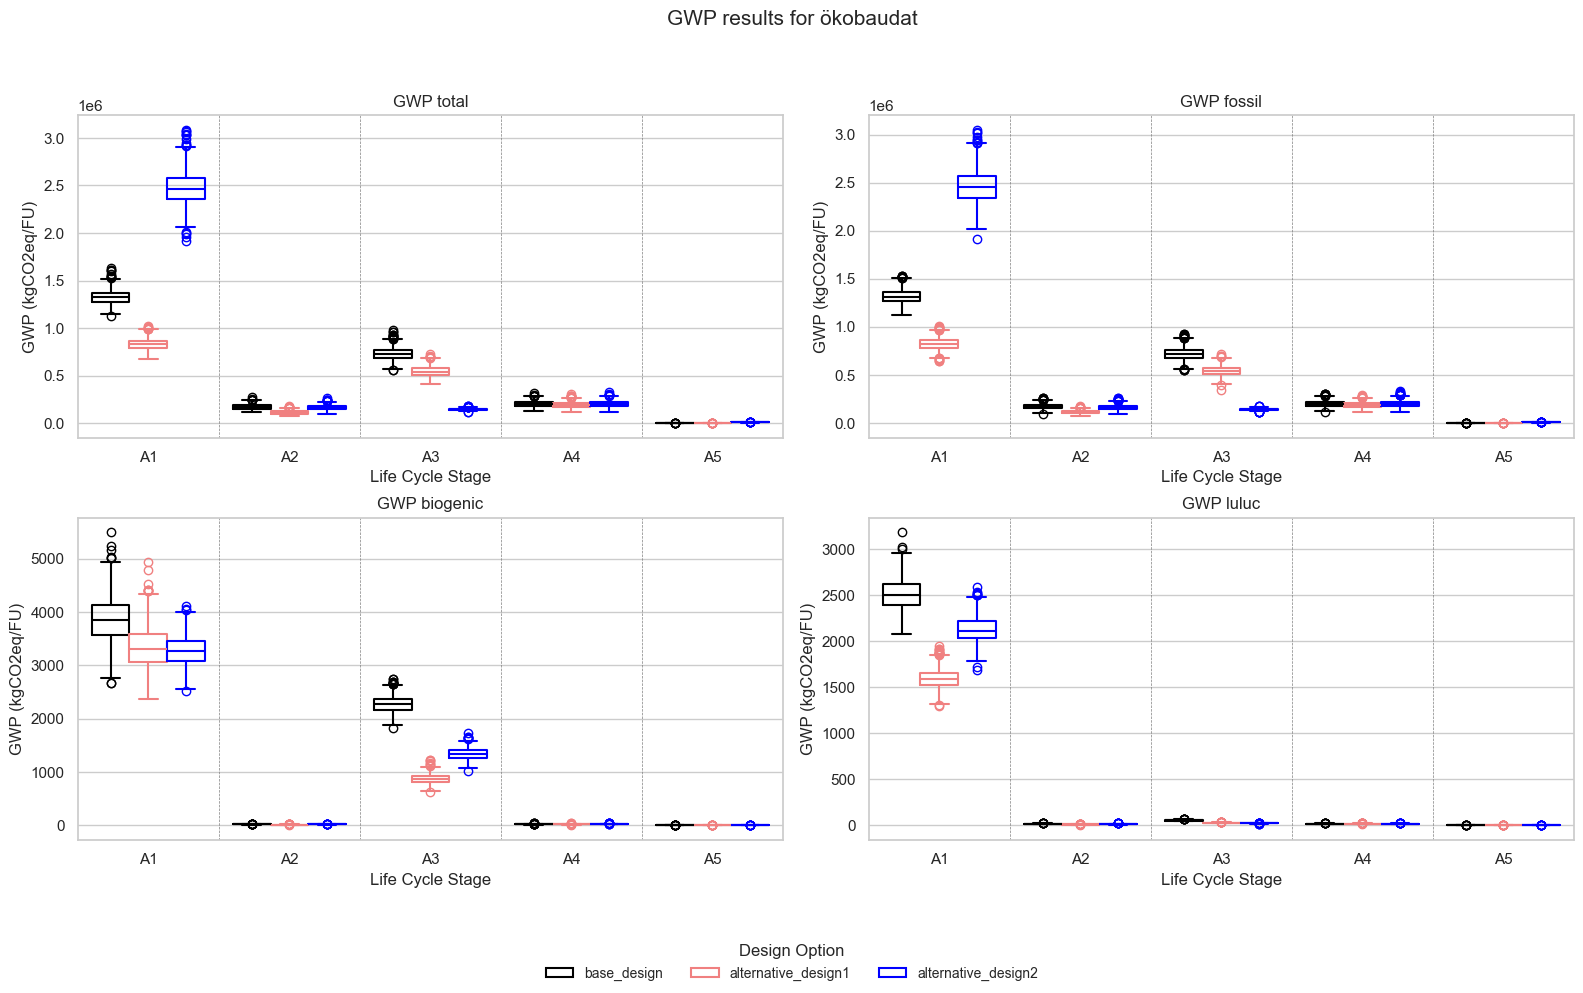

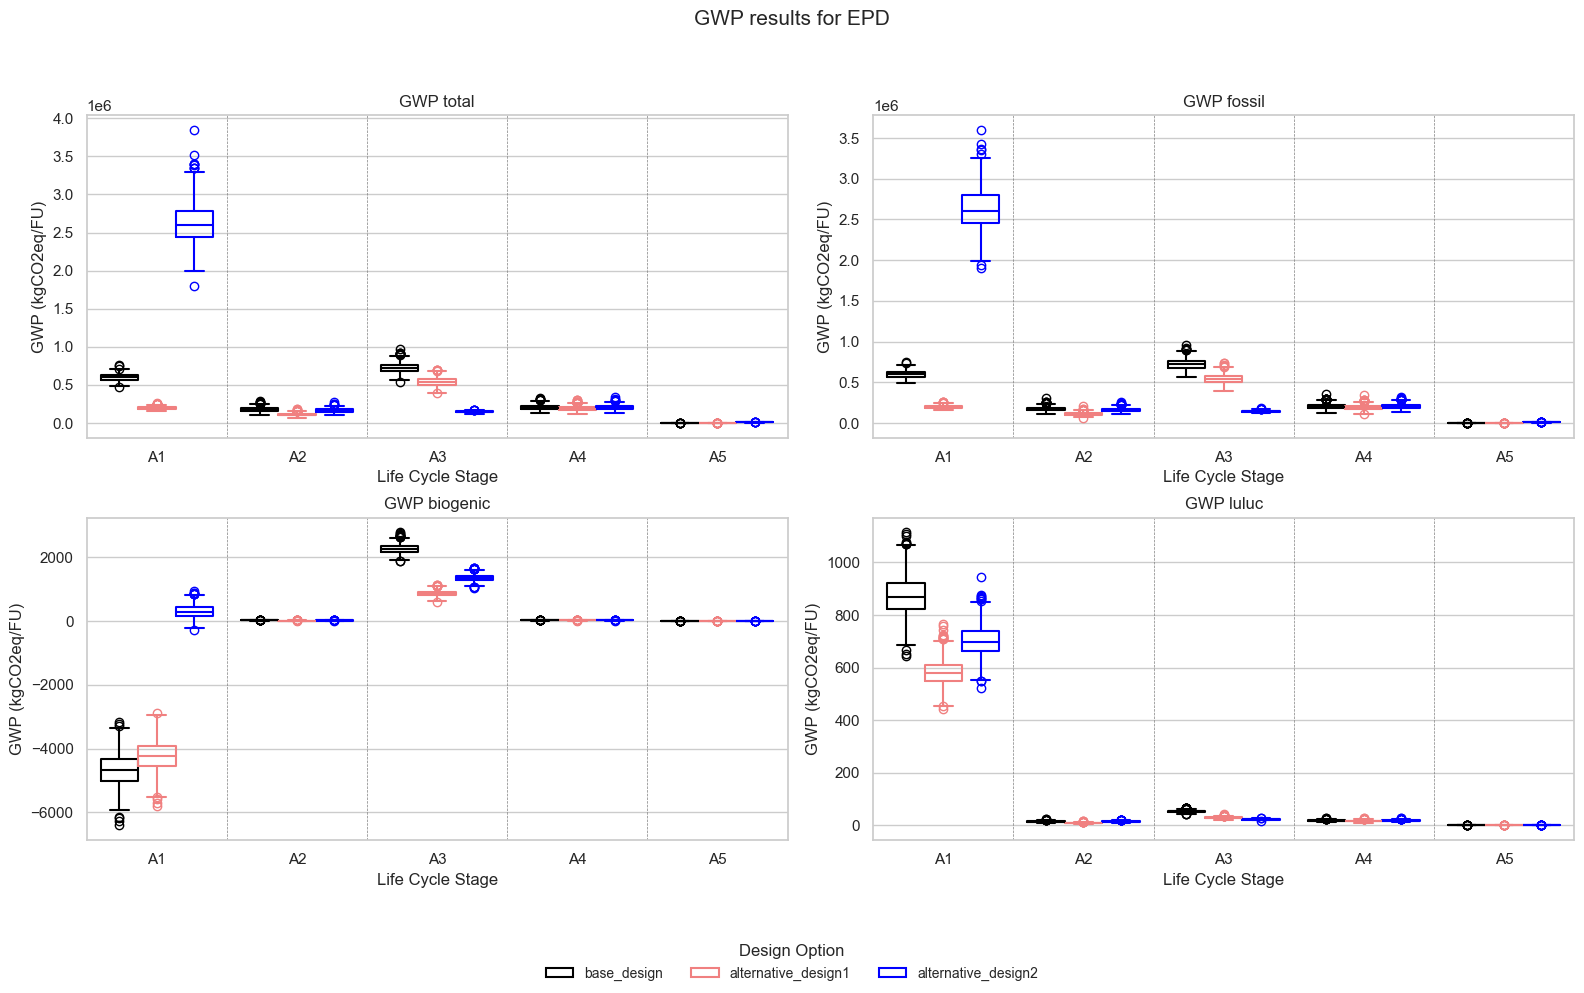

In [11]:
## create boxplots for the aggregated results to show them for each life cycle stage A1 to A5

aggregated_results = [aggregated_results_ecoinvent, aggregated_results_national, aggregated_results_epd]
print(aggregated_results)
plot_gwp_boxplots_aggregated(data=aggregated_results_ecoinvent, database_name='ecoinvent')
plot_gwp_boxplots_aggregated(data=aggregated_results_national, database_name='ökobaudat')
plot_gwp_boxplots_aggregated(data=aggregated_results_epd, database_name='EPD')

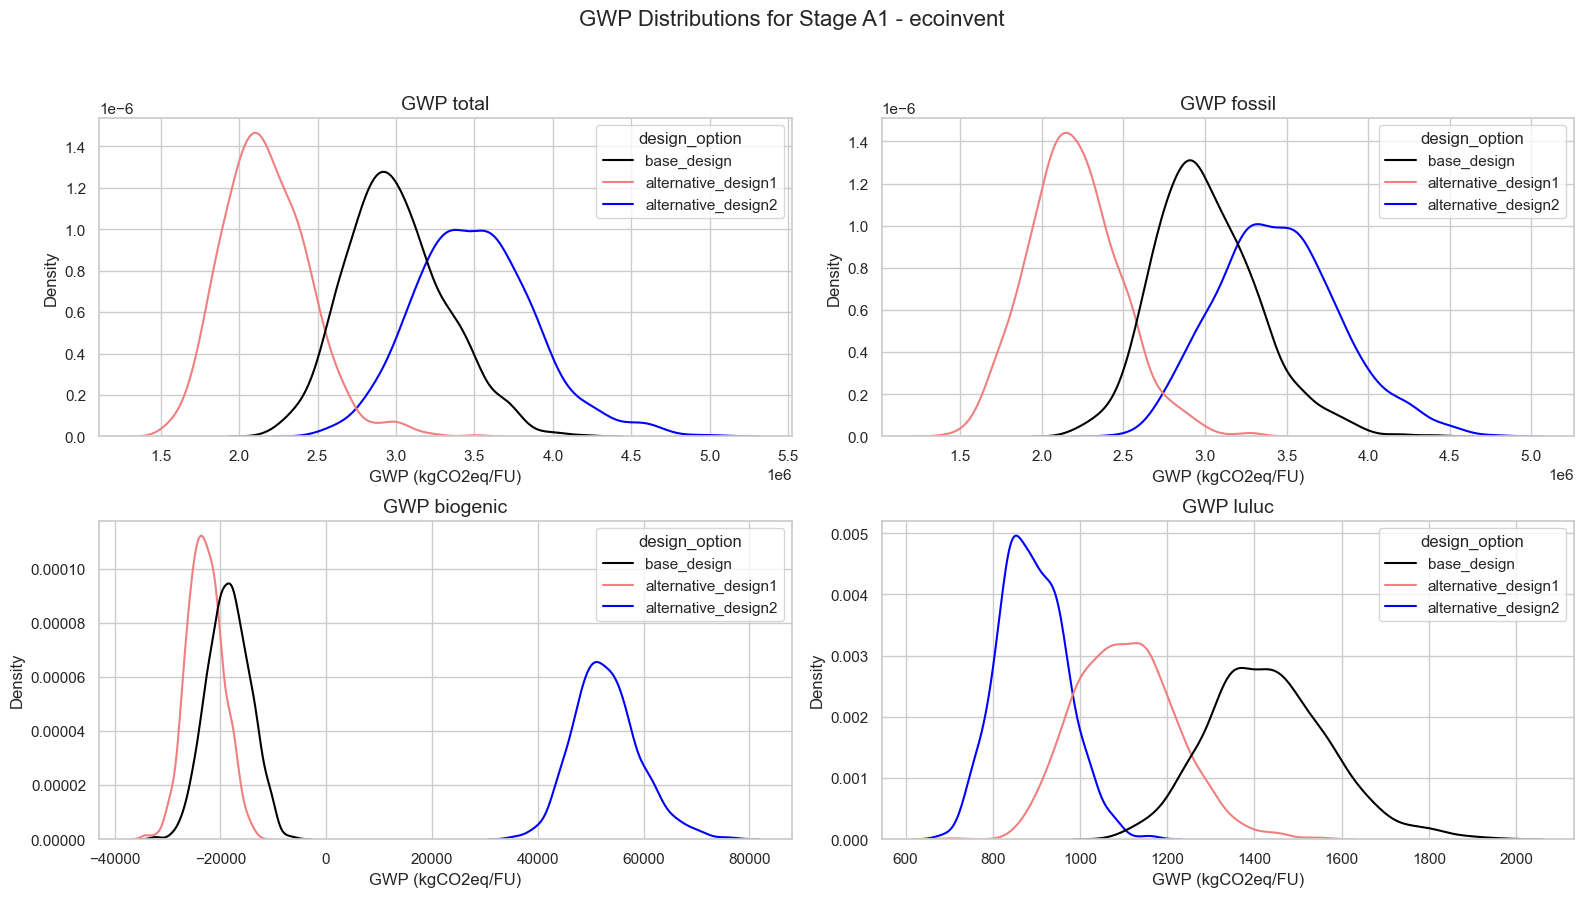

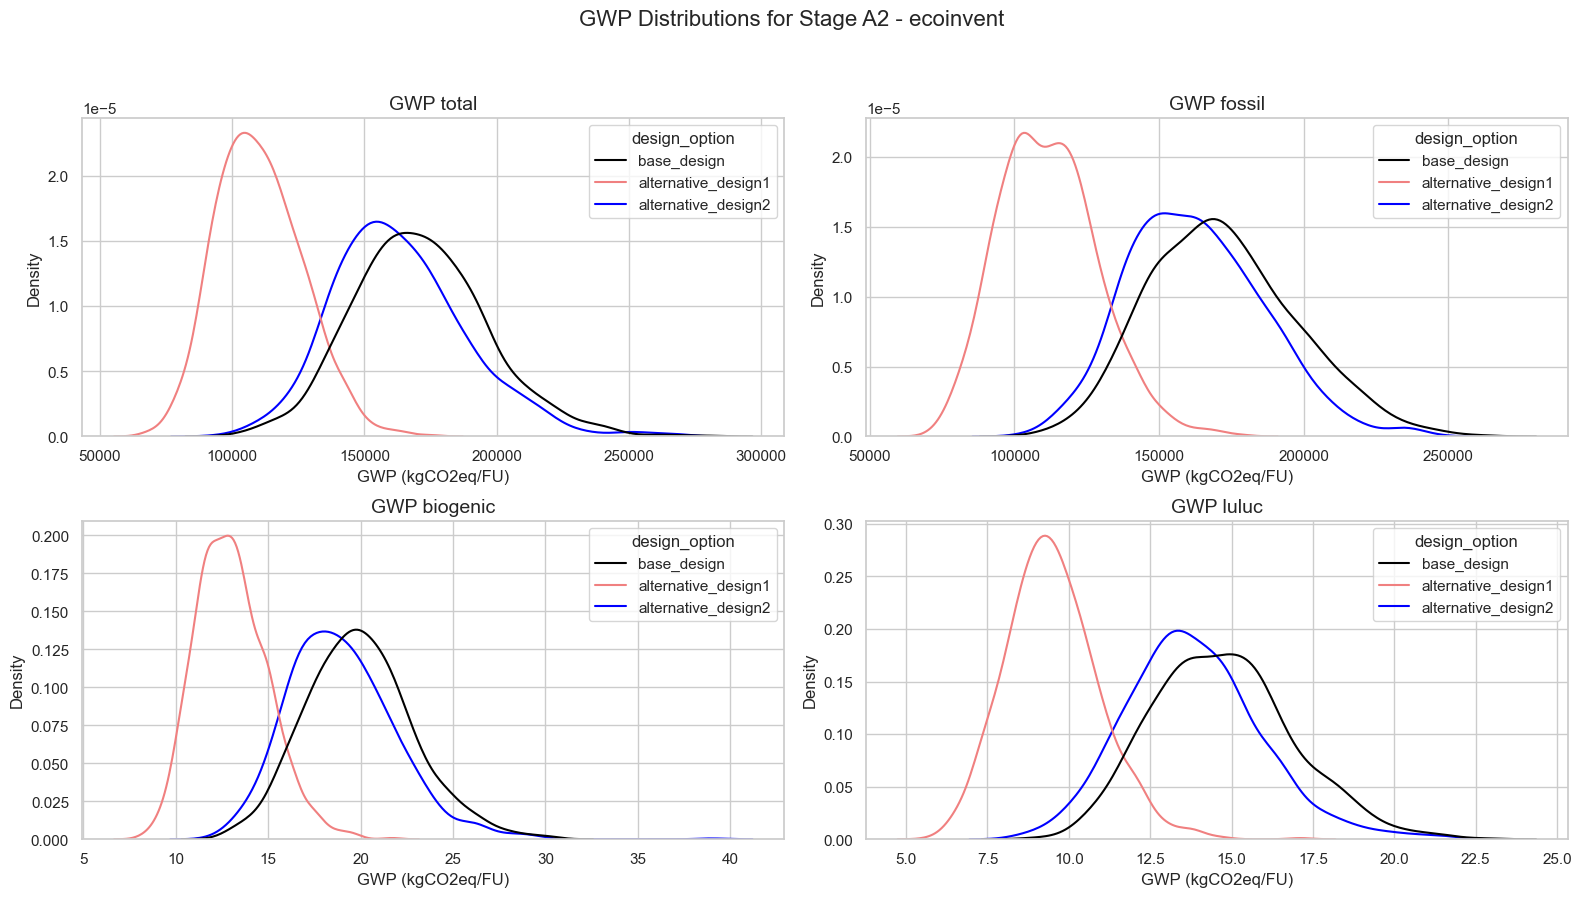

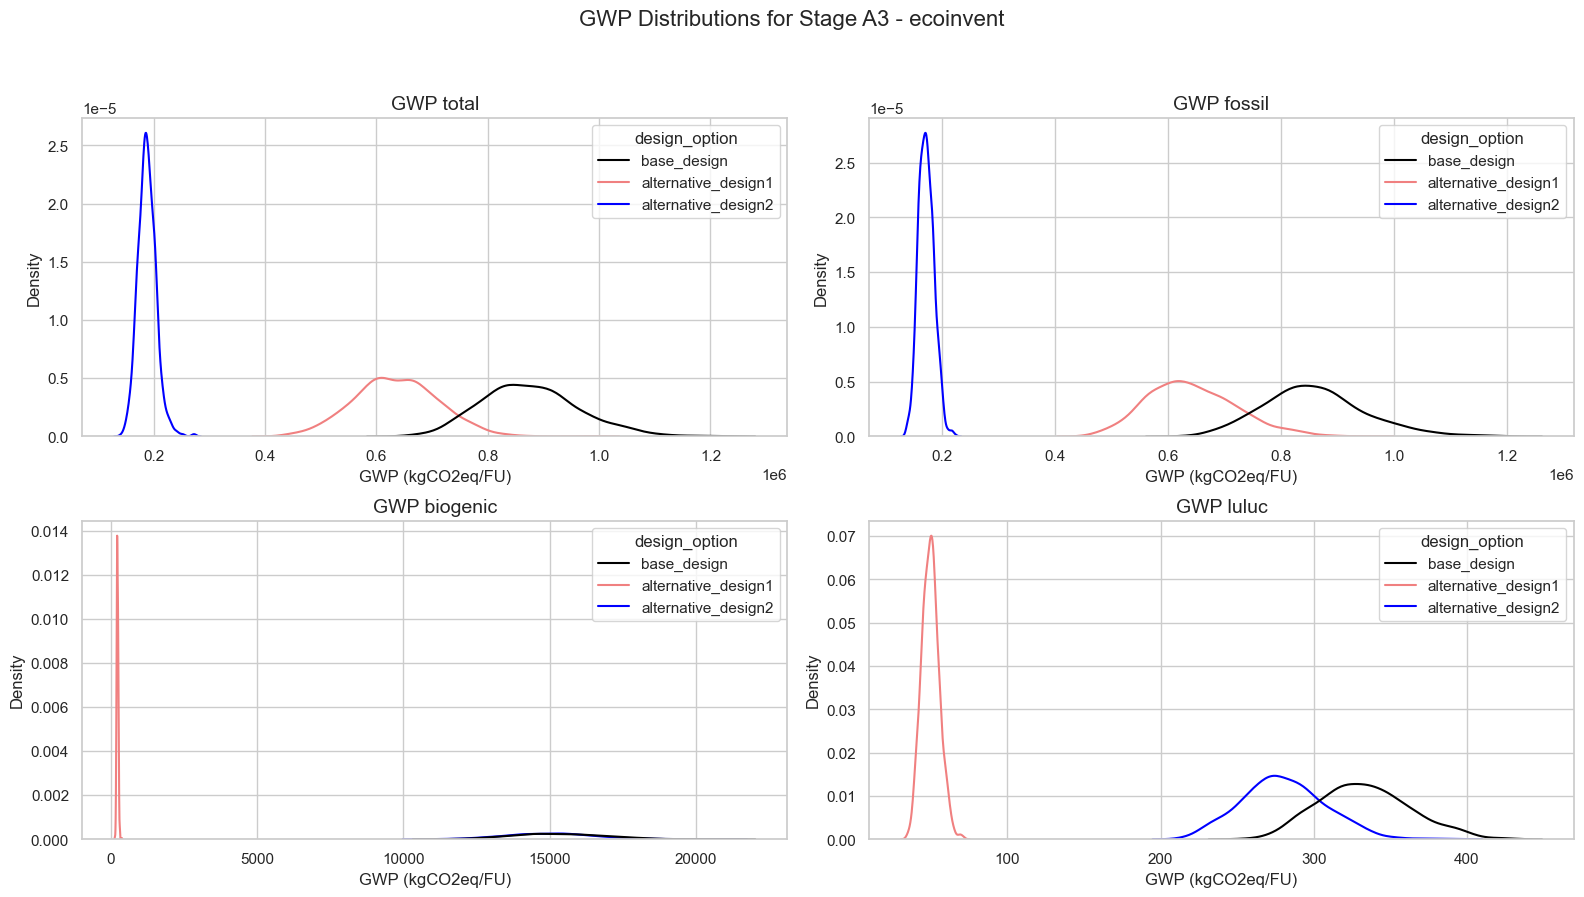

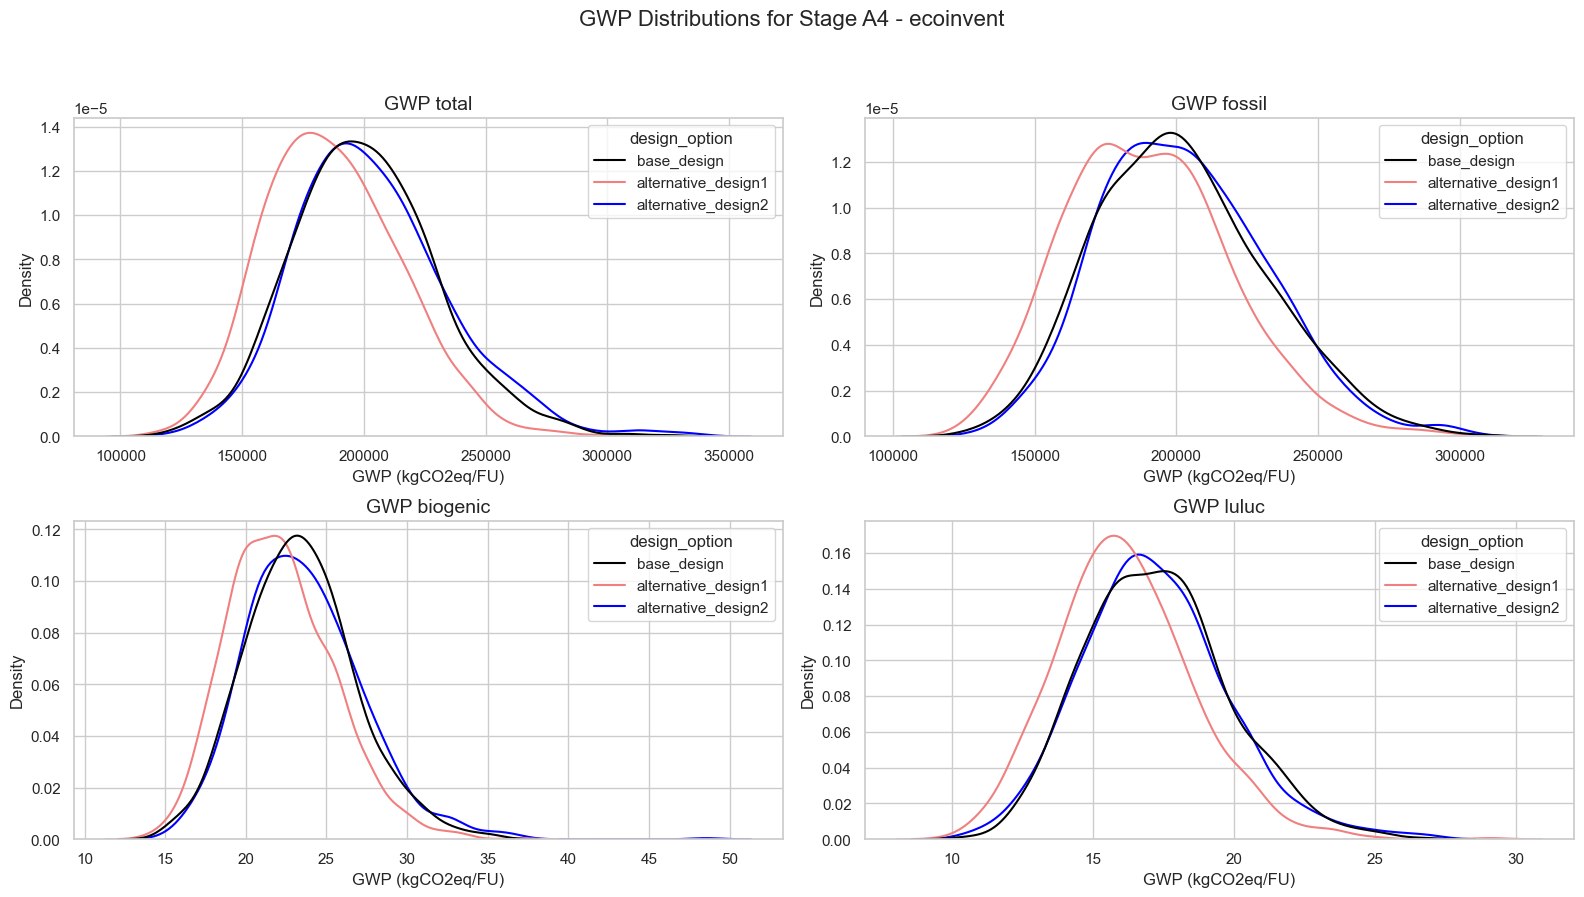

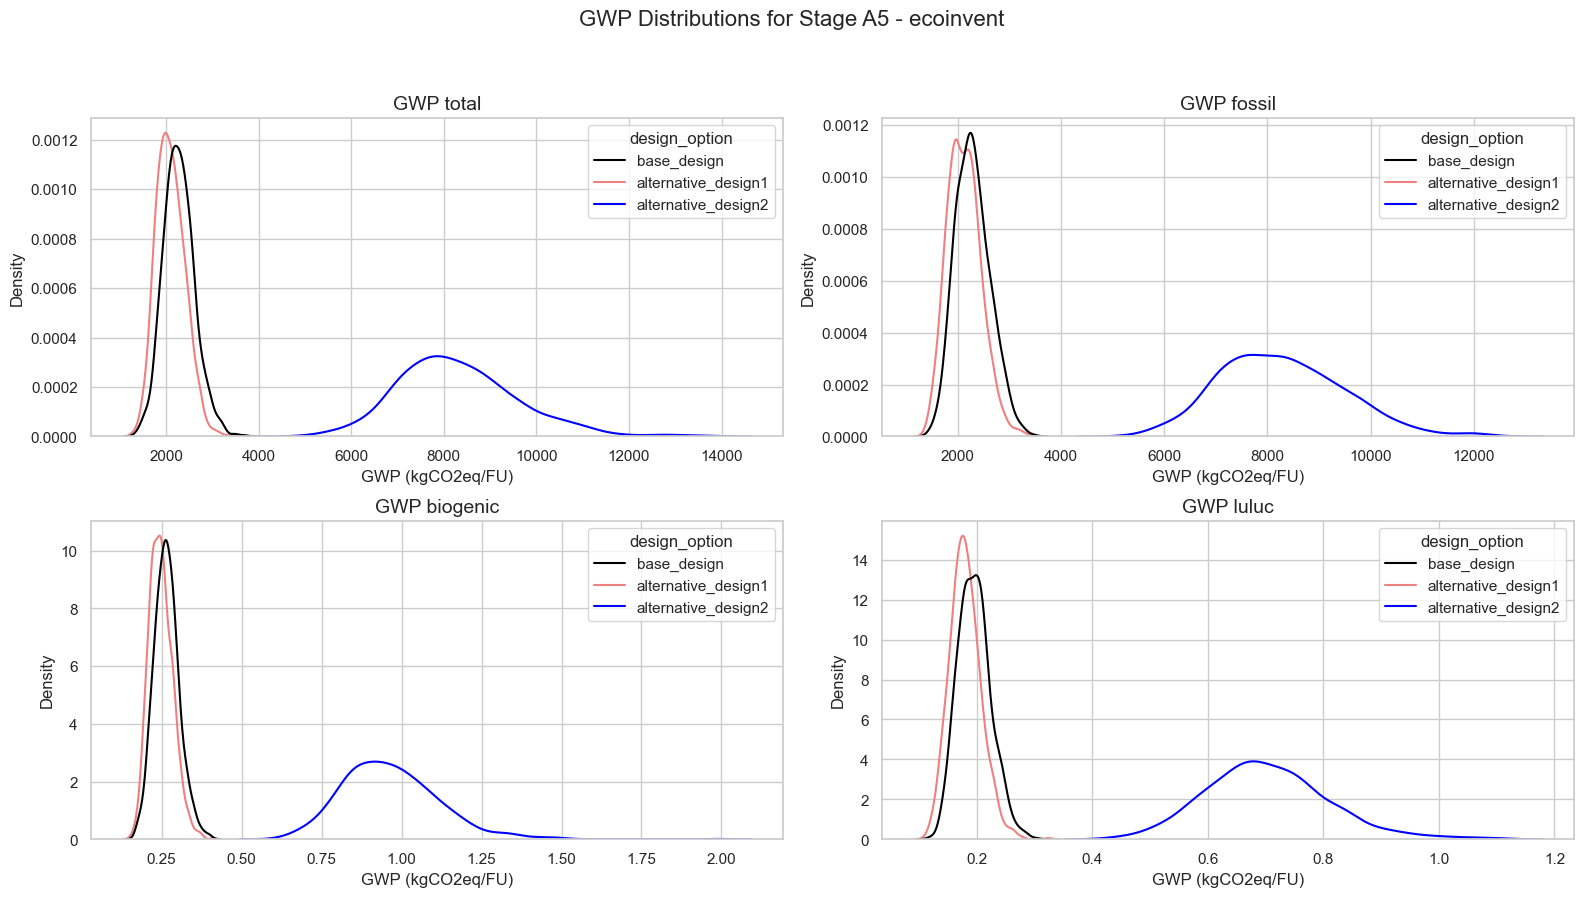

In [12]:
## show distributions per life cycle stage for ecoinvent

plot_kde_distributions_by_stage(aggregated_results_ecoinvent, database_name='ecoinvent', selected_stages=['A1'])
plot_kde_distributions_by_stage(aggregated_results_ecoinvent, database_name='ecoinvent', selected_stages=['A2'])
plot_kde_distributions_by_stage(aggregated_results_ecoinvent, database_name='ecoinvent', selected_stages=['A3'])
plot_kde_distributions_by_stage(aggregated_results_ecoinvent, database_name='ecoinvent', selected_stages=['A4'])
plot_kde_distributions_by_stage(aggregated_results_ecoinvent, database_name='ecoinvent', selected_stages=['A5'])

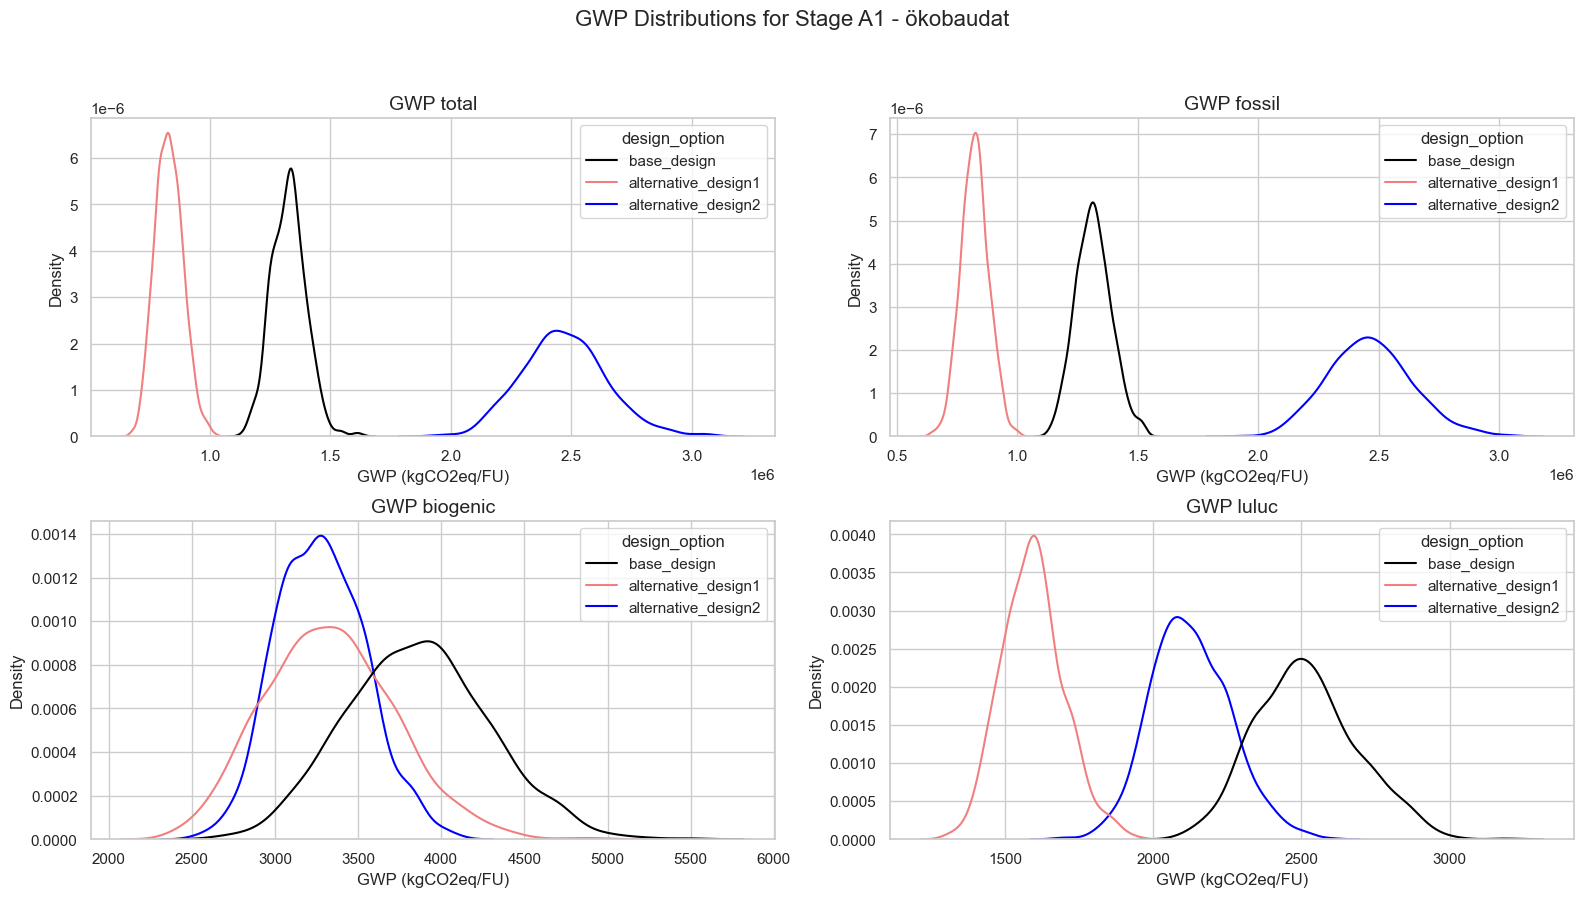

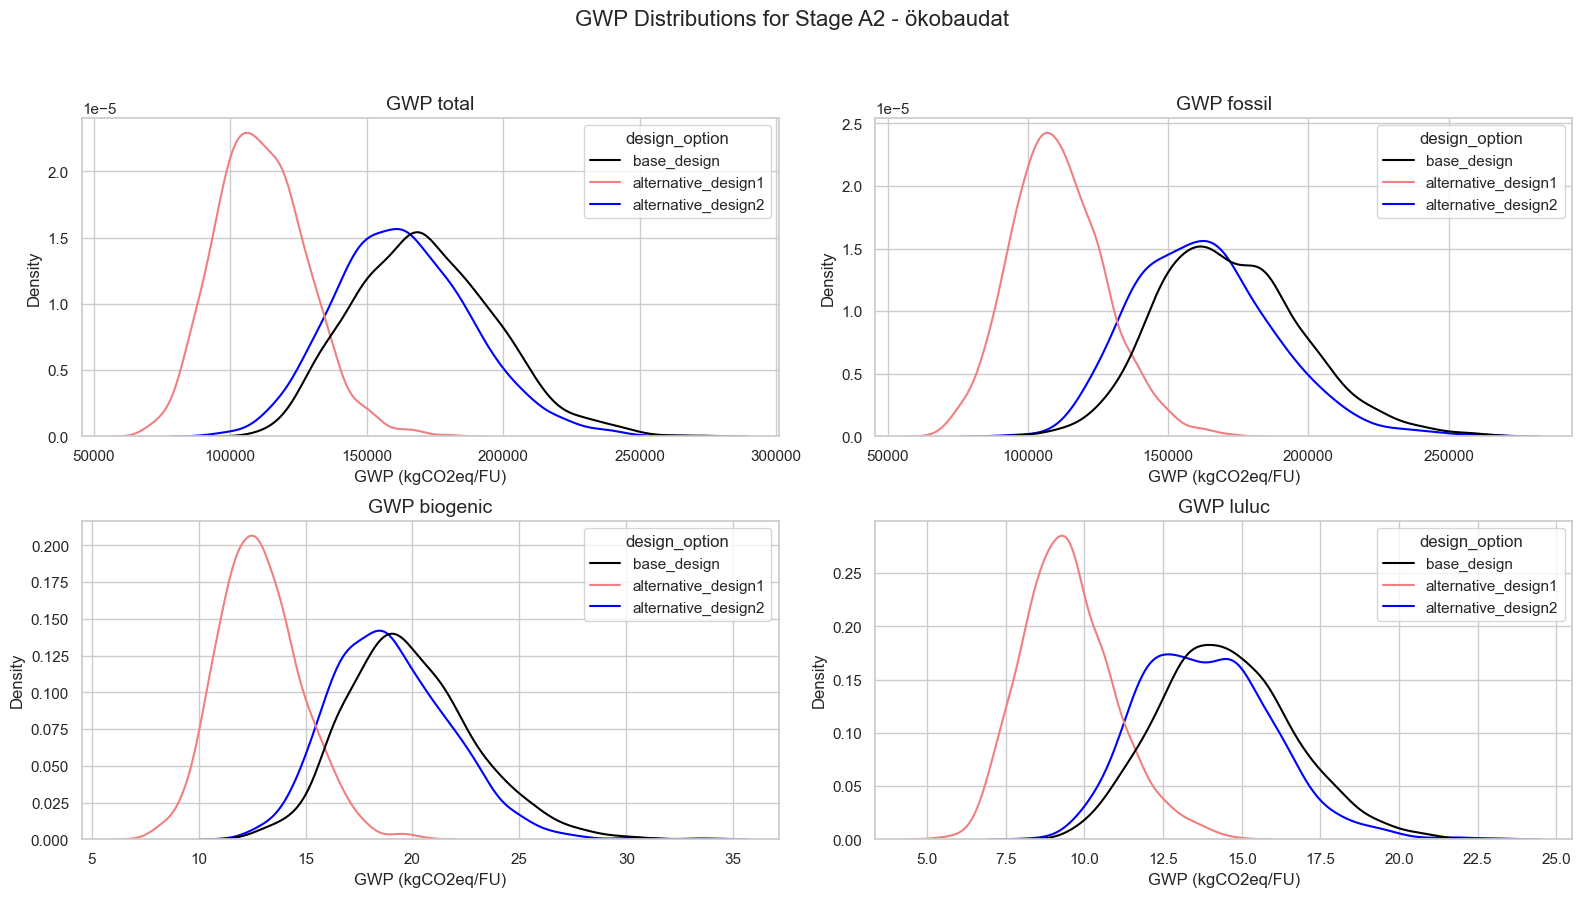

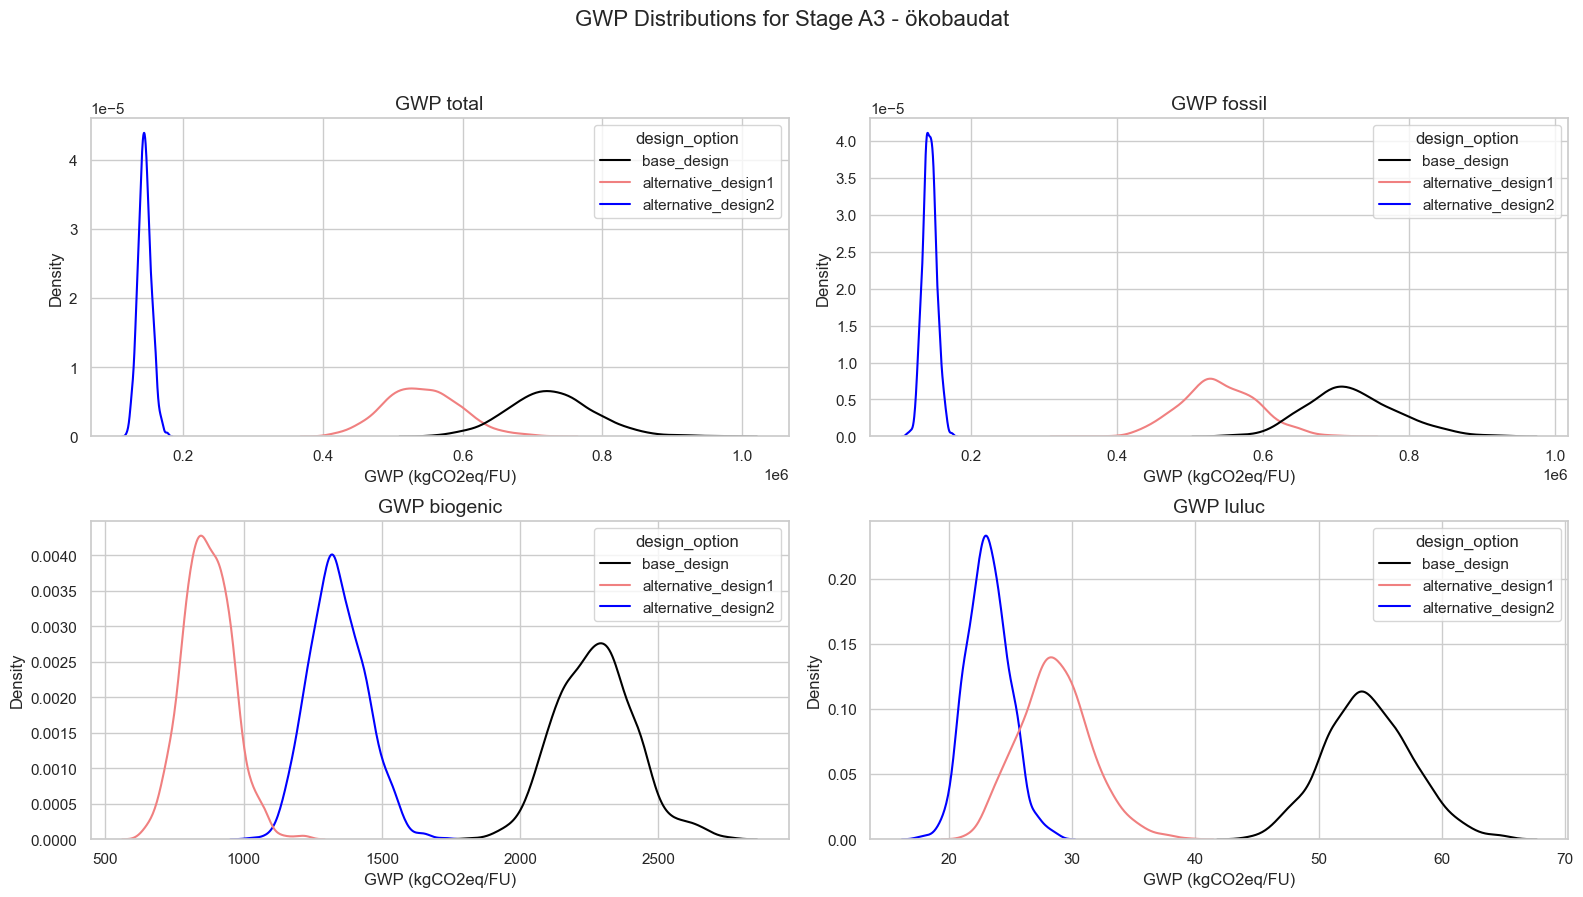

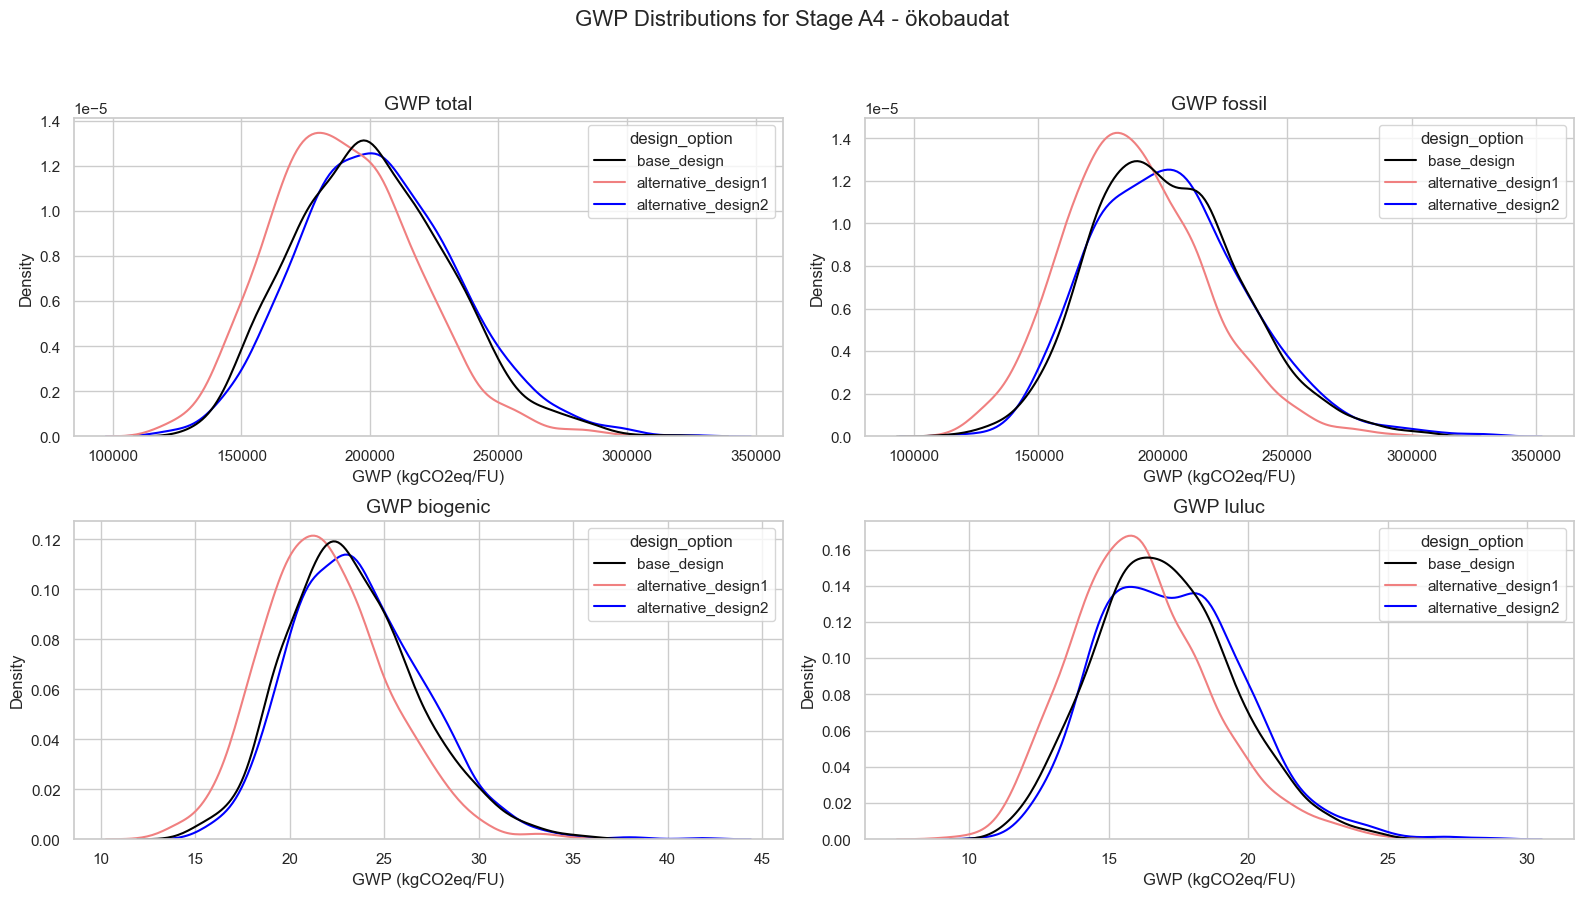

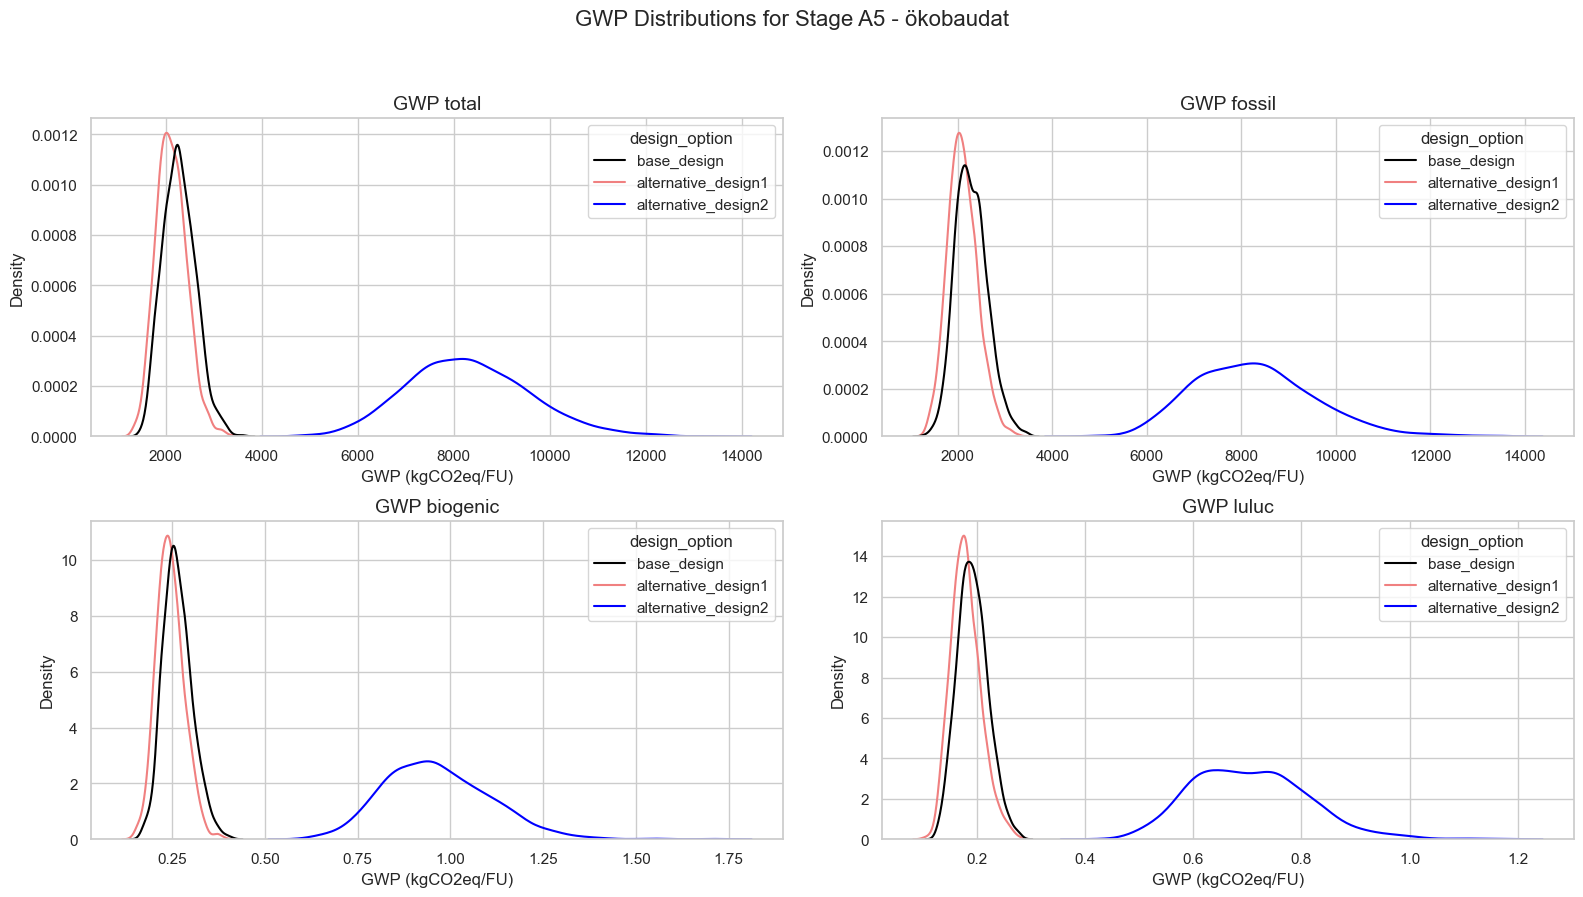

In [13]:
## show distributions per life cycle stage for ökobaudat

plot_kde_distributions_by_stage(aggregated_results_national, database_name='ökobaudat', selected_stages=['A1'])
plot_kde_distributions_by_stage(aggregated_results_national, database_name='ökobaudat', selected_stages=['A2'])
plot_kde_distributions_by_stage(aggregated_results_national, database_name='ökobaudat', selected_stages=['A3'])
plot_kde_distributions_by_stage(aggregated_results_national, database_name='ökobaudat', selected_stages=['A4'])
plot_kde_distributions_by_stage(aggregated_results_national, database_name='ökobaudat', selected_stages=['A5'])

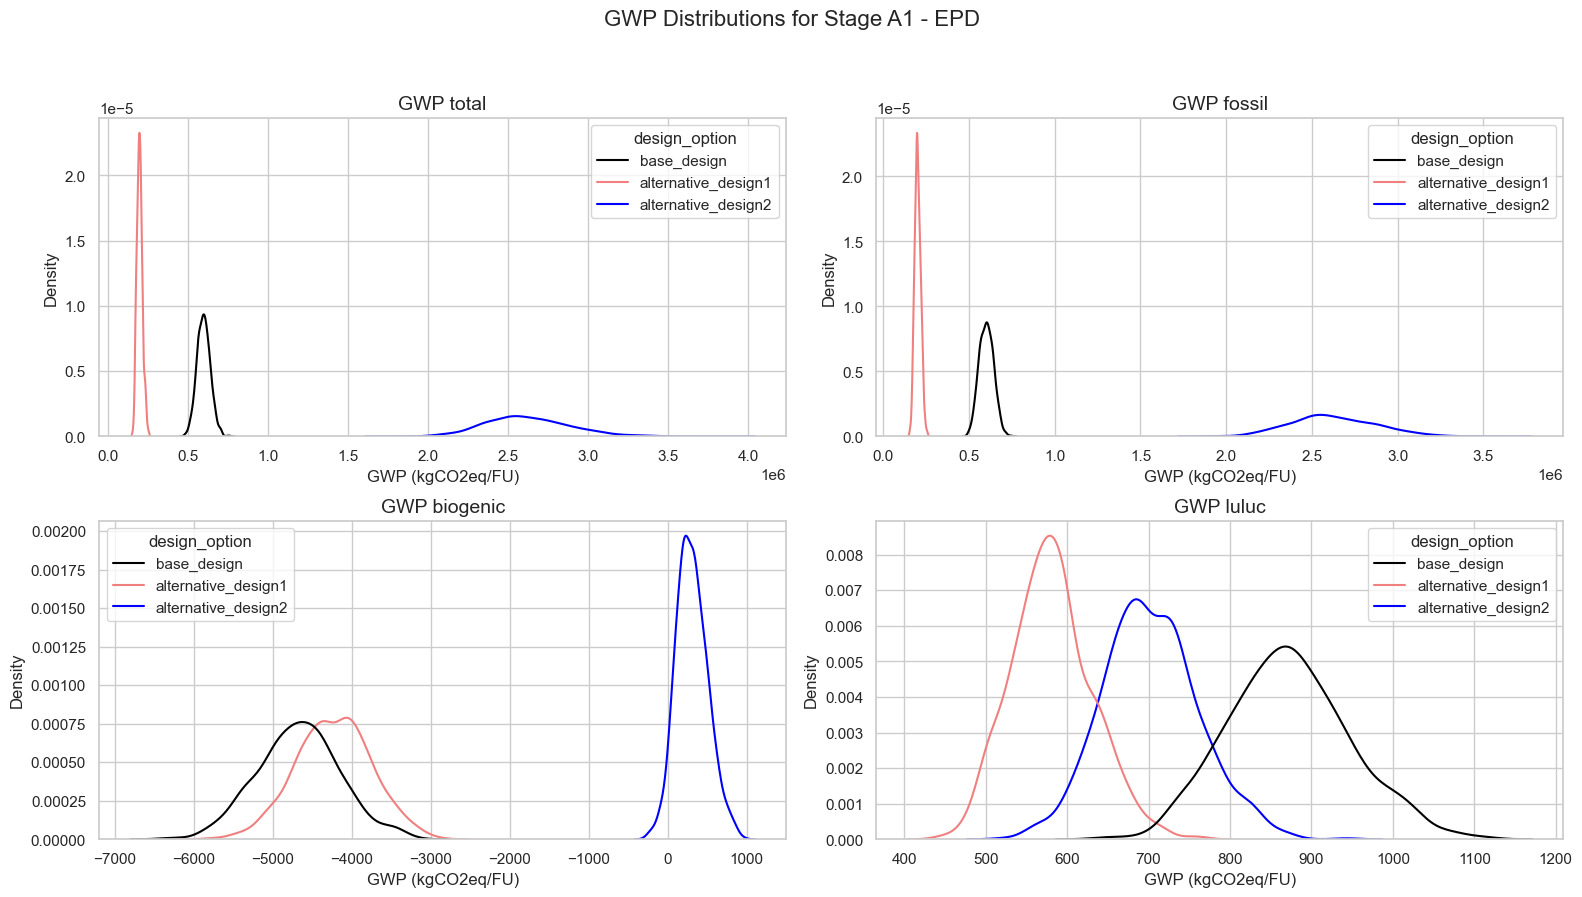

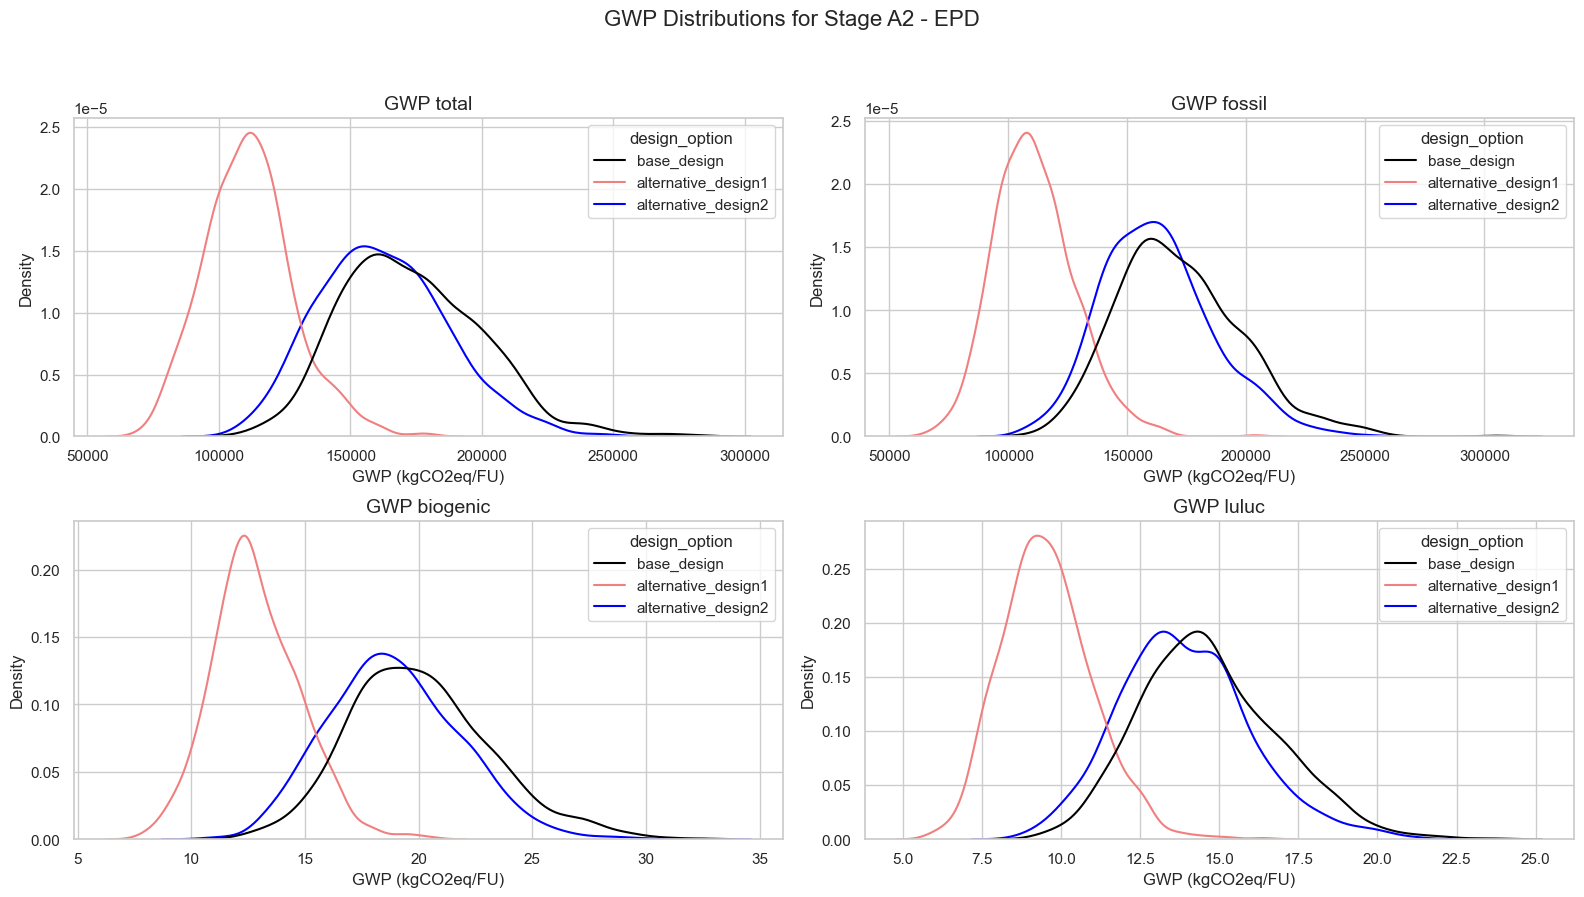

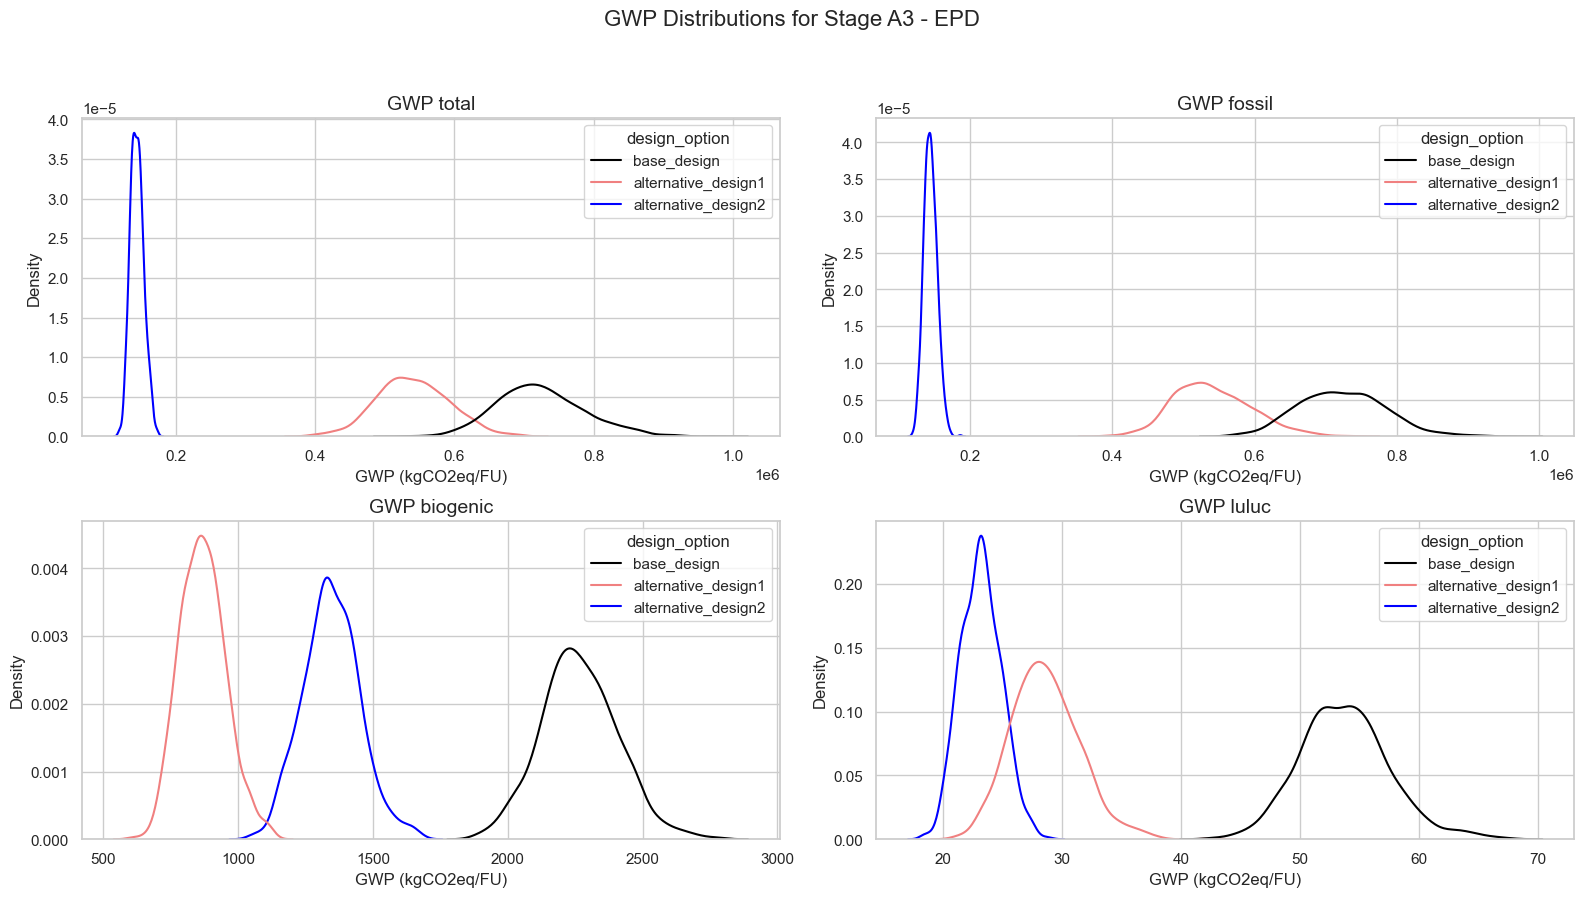

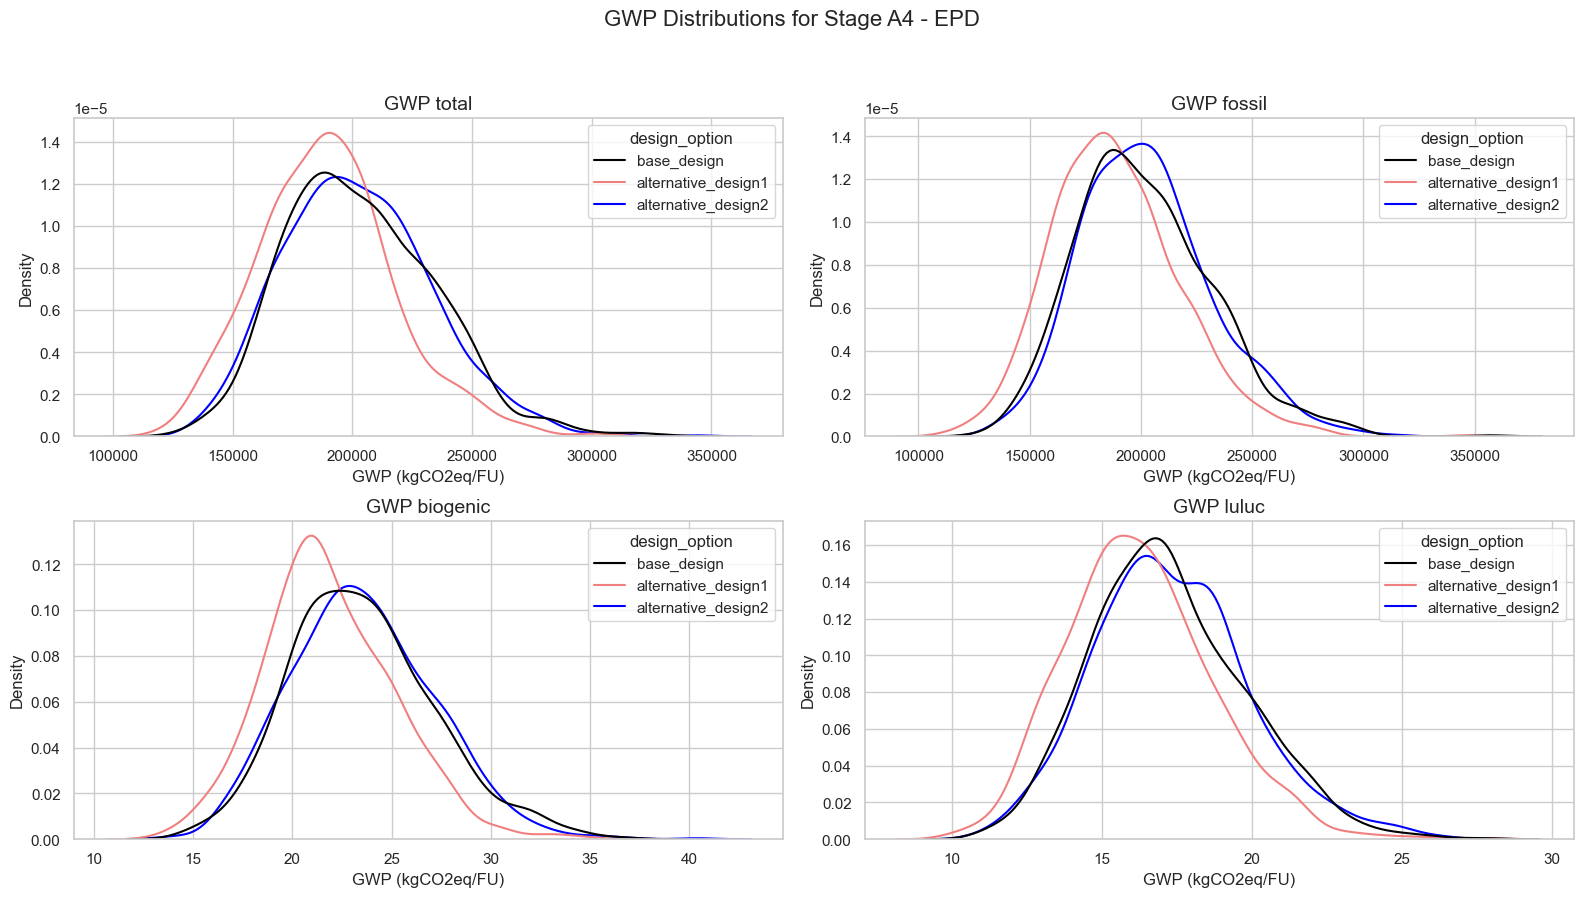

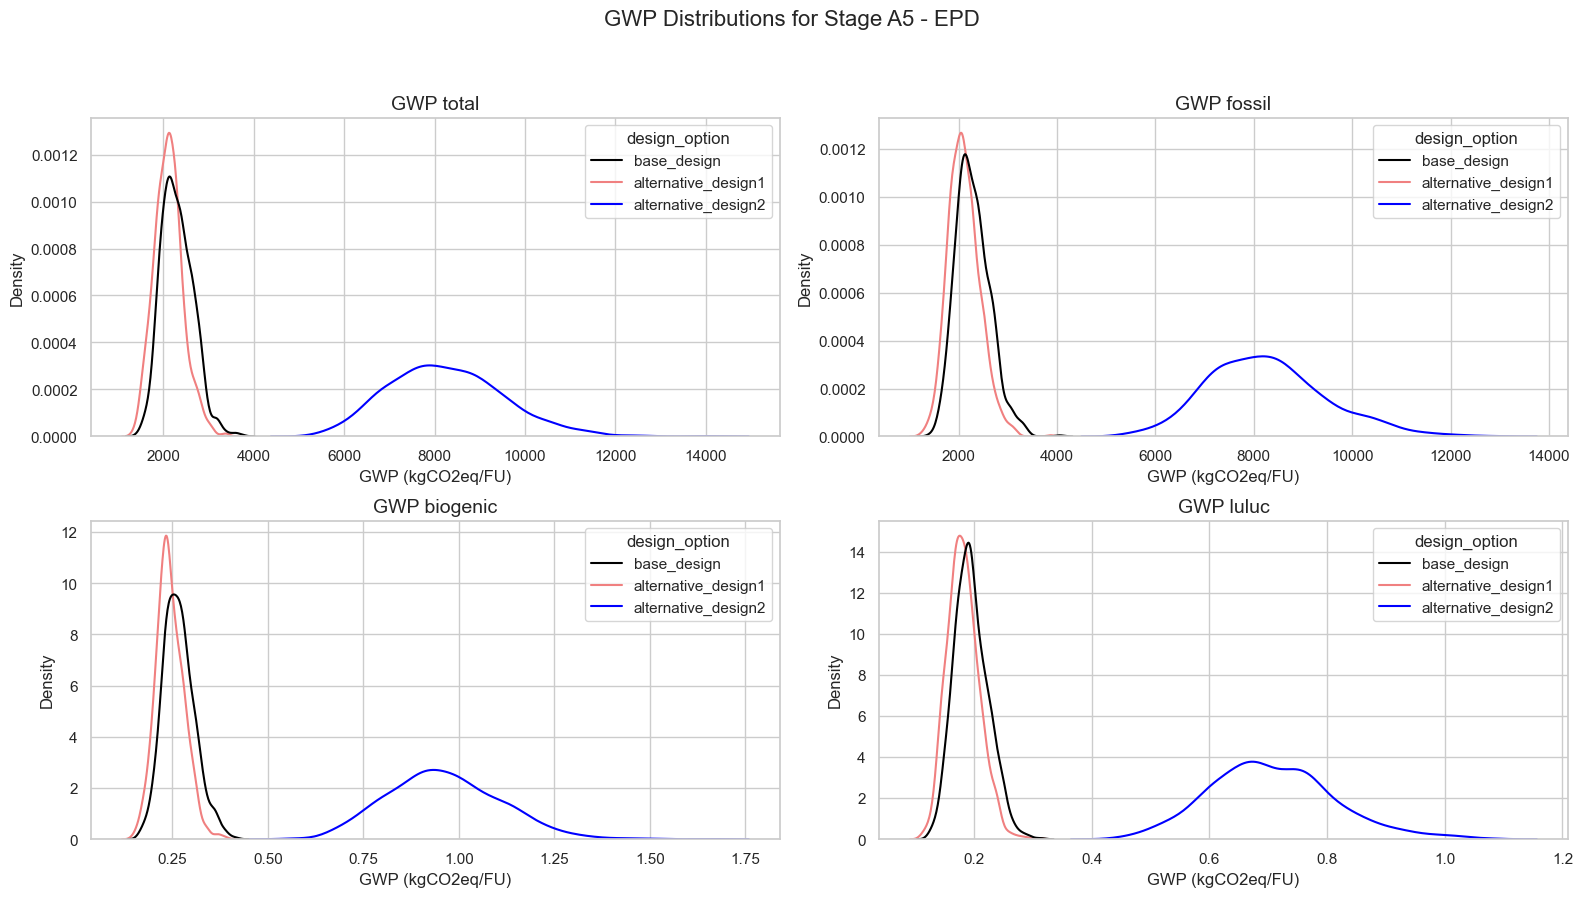

In [14]:
## show distributions per life cycle stage for EPD

plot_kde_distributions_by_stage(aggregated_results_epd, database_name='EPD', selected_stages=['A1'])
plot_kde_distributions_by_stage(aggregated_results_epd, database_name='EPD', selected_stages=['A2'])
plot_kde_distributions_by_stage(aggregated_results_epd, database_name='EPD', selected_stages=['A3'])
plot_kde_distributions_by_stage(aggregated_results_epd, database_name='EPD', selected_stages=['A4'])
plot_kde_distributions_by_stage(aggregated_results_epd, database_name='EPD', selected_stages=['A5'])

### Plot stage specific boxplots for each design option, comparing databases

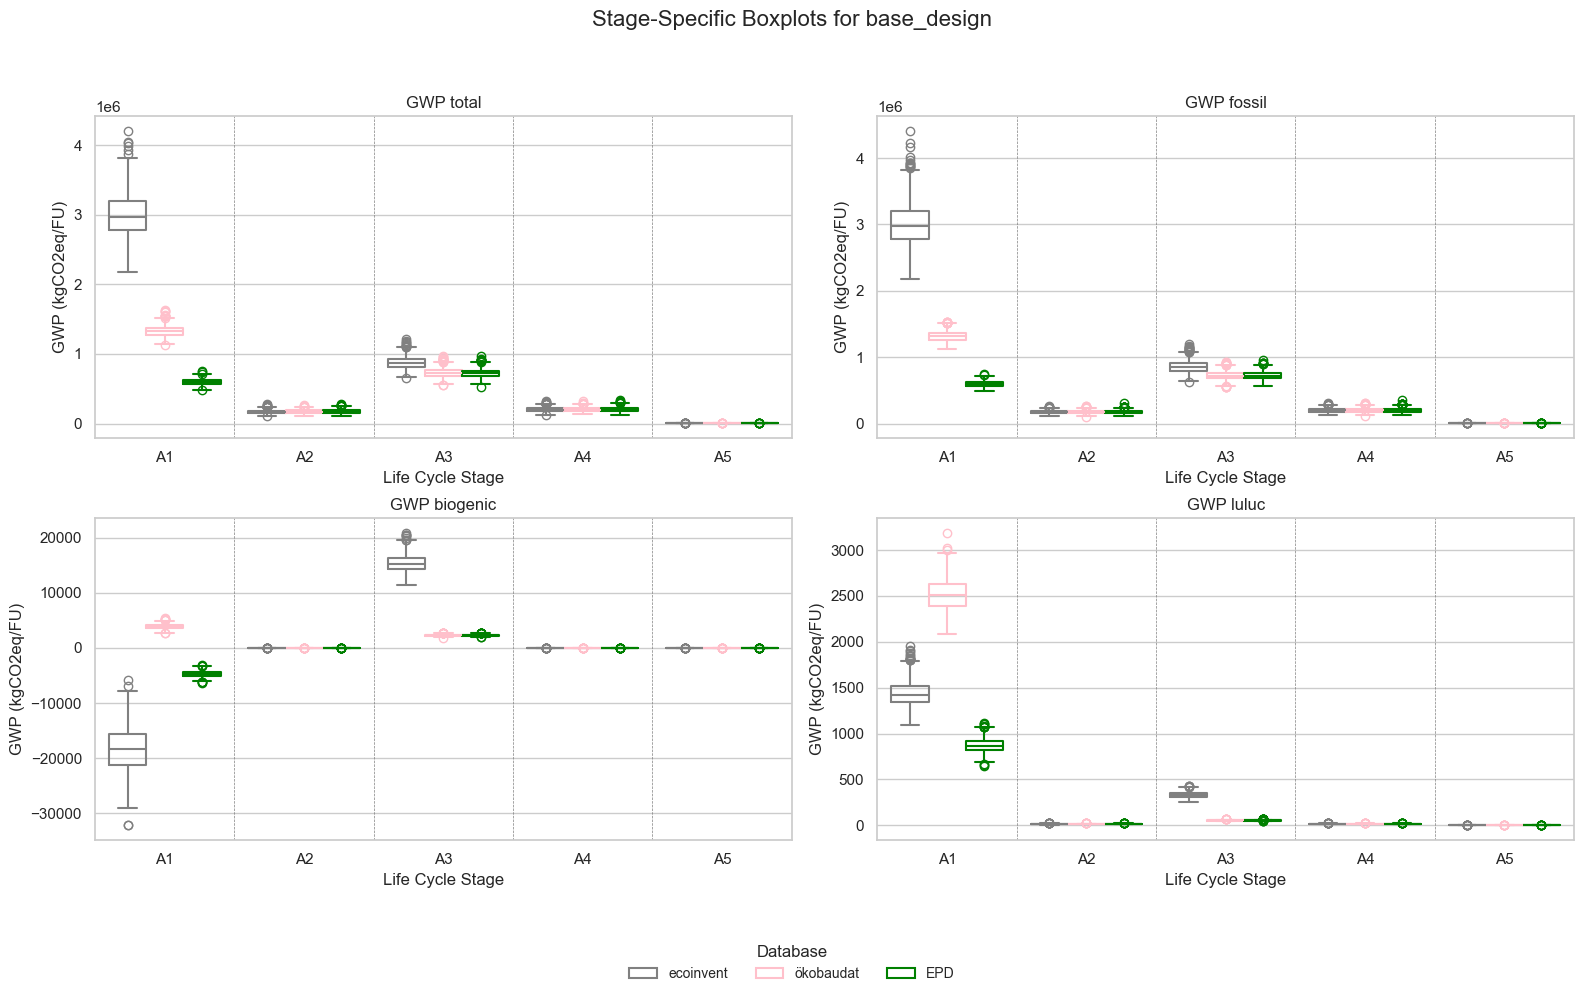

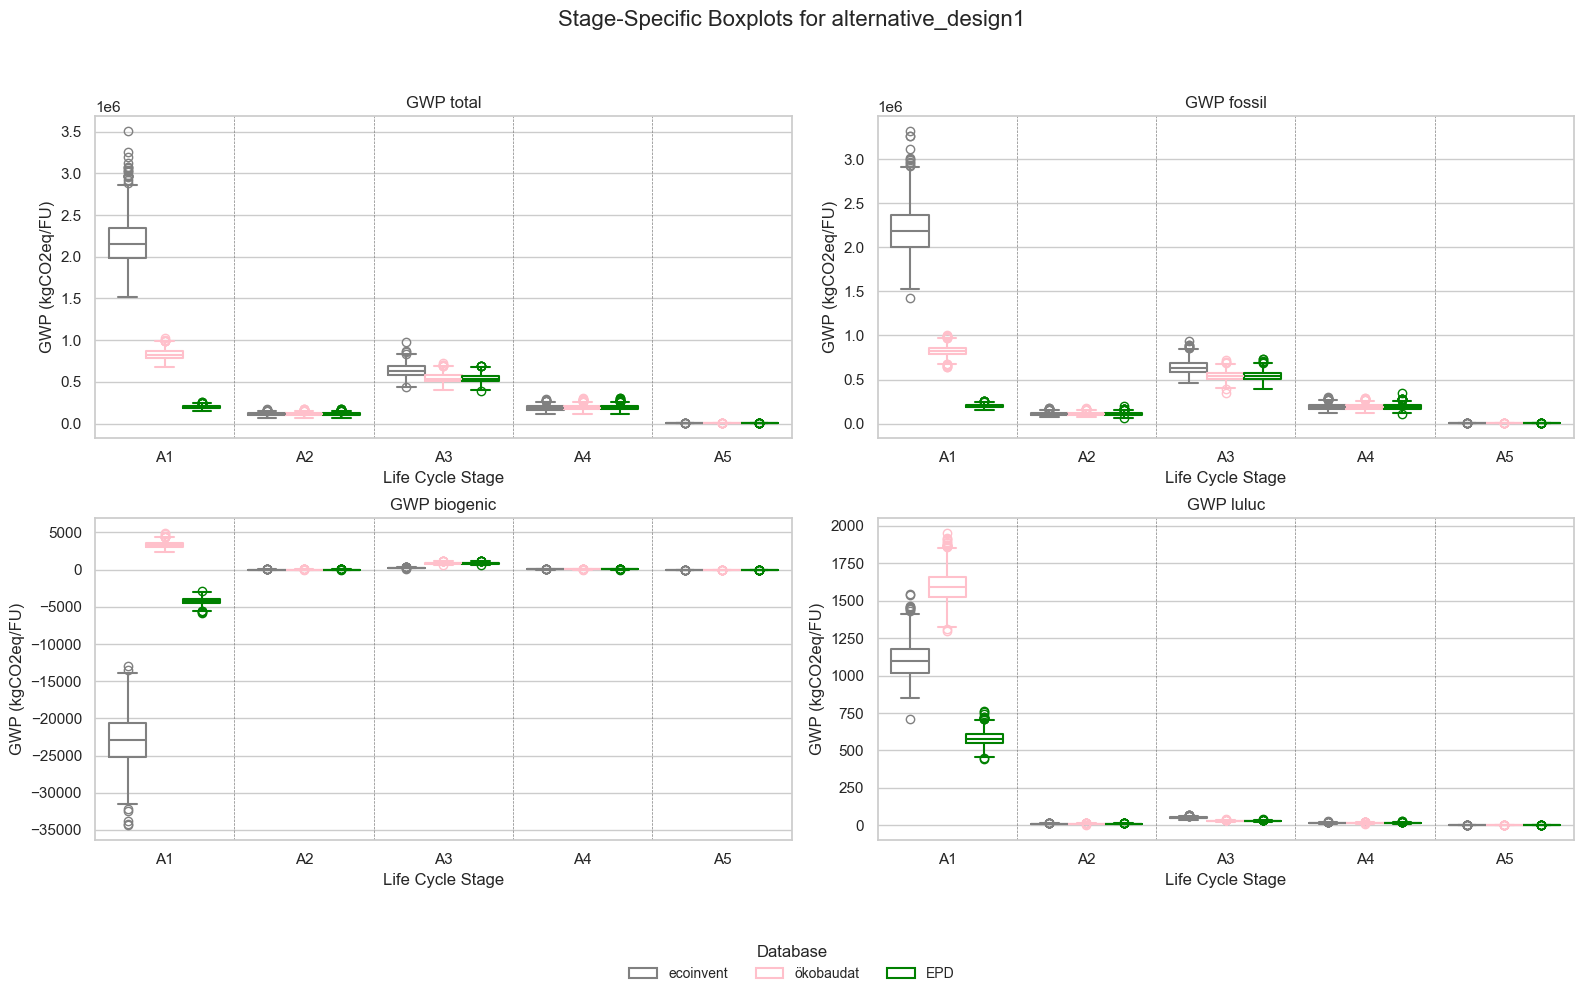

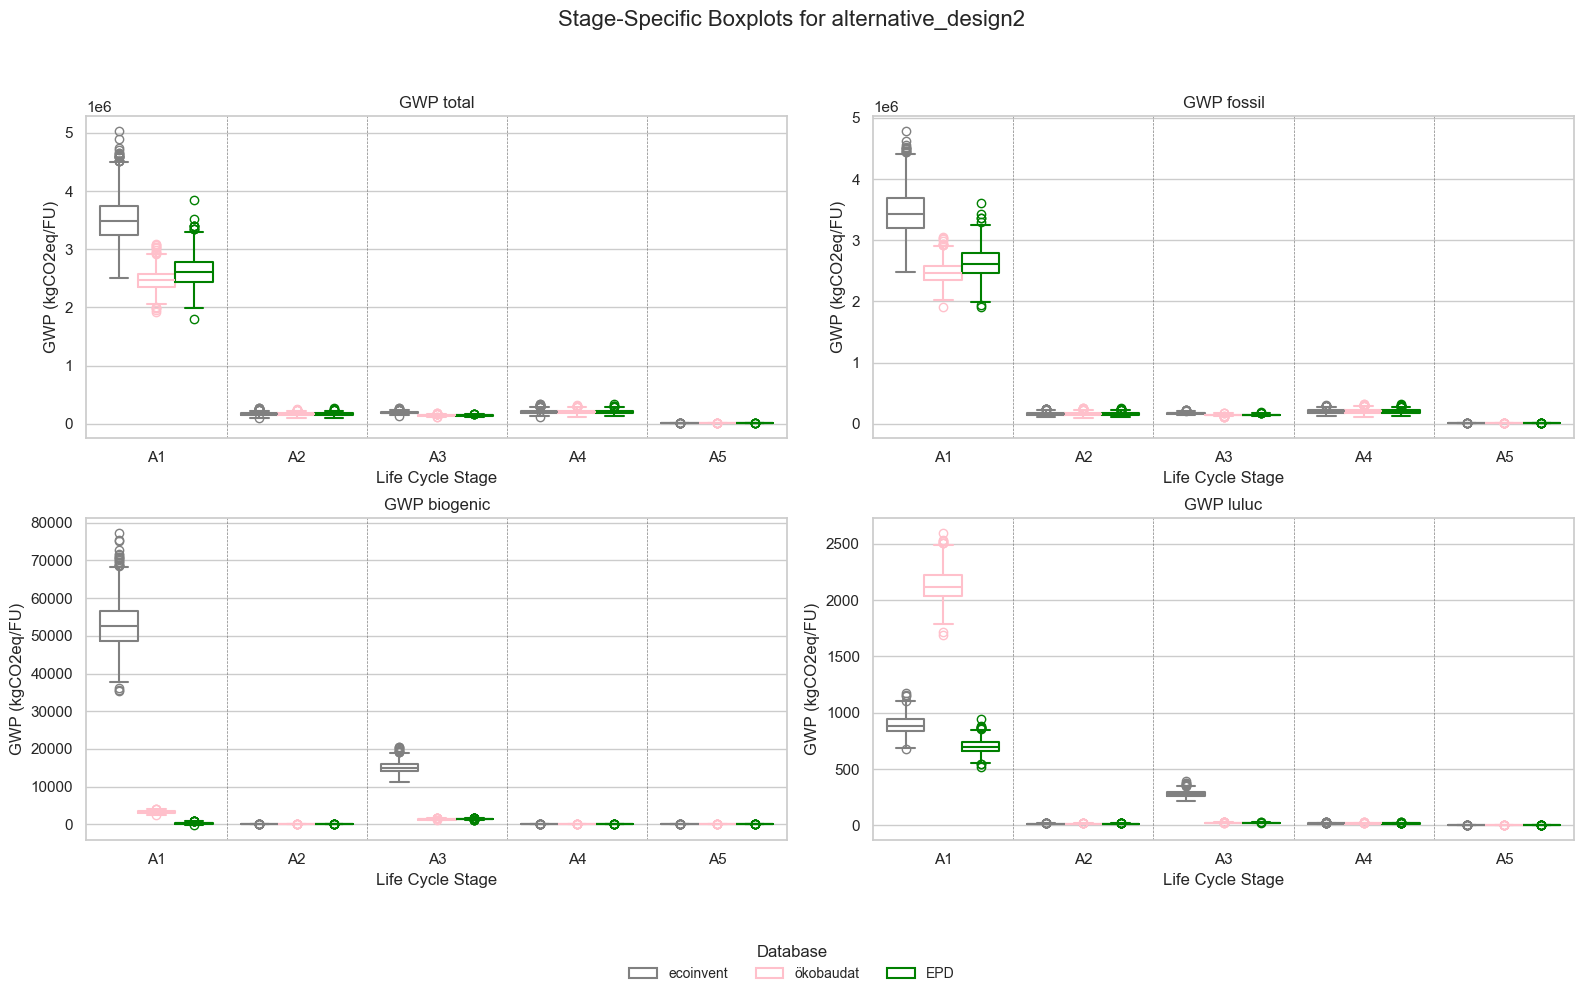

In [15]:
## plot the stage specific LCA results, but for each design option

plot_stage_specific_boxplots(aggregated_results)

### Calculate Statistical Parameters for Life Cycle Stages and databases

In [16]:
## statistical parameters for life cycle stages

## ecoinvent
stat_results_ecoinvent = calculate_statistical_parameters_life_cycle_stages(aggregated_results_ecoinvent)
stat_results_ecoinvent_table = convert_statistical_data_to_table_life_cycle_stages(stat_results_ecoinvent)
stat_results_ecoinvent_table.to_csv("stat_results_ecoinvent.csv", index=False)

## ökobaudat
stat_results_national = calculate_statistical_parameters_life_cycle_stages(aggregated_results_national)
stat_results_national_table = convert_statistical_data_to_table_life_cycle_stages(stat_results_national)
stat_results_national_table.to_csv("stat_results_national.csv", index=False)

## EPD
stat_results_epd = calculate_statistical_parameters_life_cycle_stages(aggregated_results_epd)
stat_results_epd_table = convert_statistical_data_to_table_life_cycle_stages(stat_results_epd)
stat_results_epd_table.to_csv("stat_results_epd.csv", index=False)
print(stat_results_national_table)

          Design Option Life Cycle Stage Impact Category          Mean  \
0           base_design               A1       gwp_total  1.327354e+06   
1           base_design               A1      gwp_fossil  1.317339e+06   
2           base_design               A1    gwp_biogenic  3.858593e+03   
3           base_design               A1       gwp_luluc  2.516548e+03   
4           base_design               A2       gwp_total  1.713844e+05   
5           base_design               A2      gwp_fossil  1.719591e+05   
6           base_design               A2    gwp_biogenic  1.987920e+01   
7           base_design               A2       gwp_luluc  1.448770e+01   
8           base_design               A3       gwp_total  7.270883e+05   
9           base_design               A3      gwp_fossil  7.222554e+05   
10          base_design               A3    gwp_biogenic  2.272121e+03   
11          base_design               A3       gwp_luluc  5.403898e+01   
12          base_design               

### GWP Contribution Analysis based on Stage A1

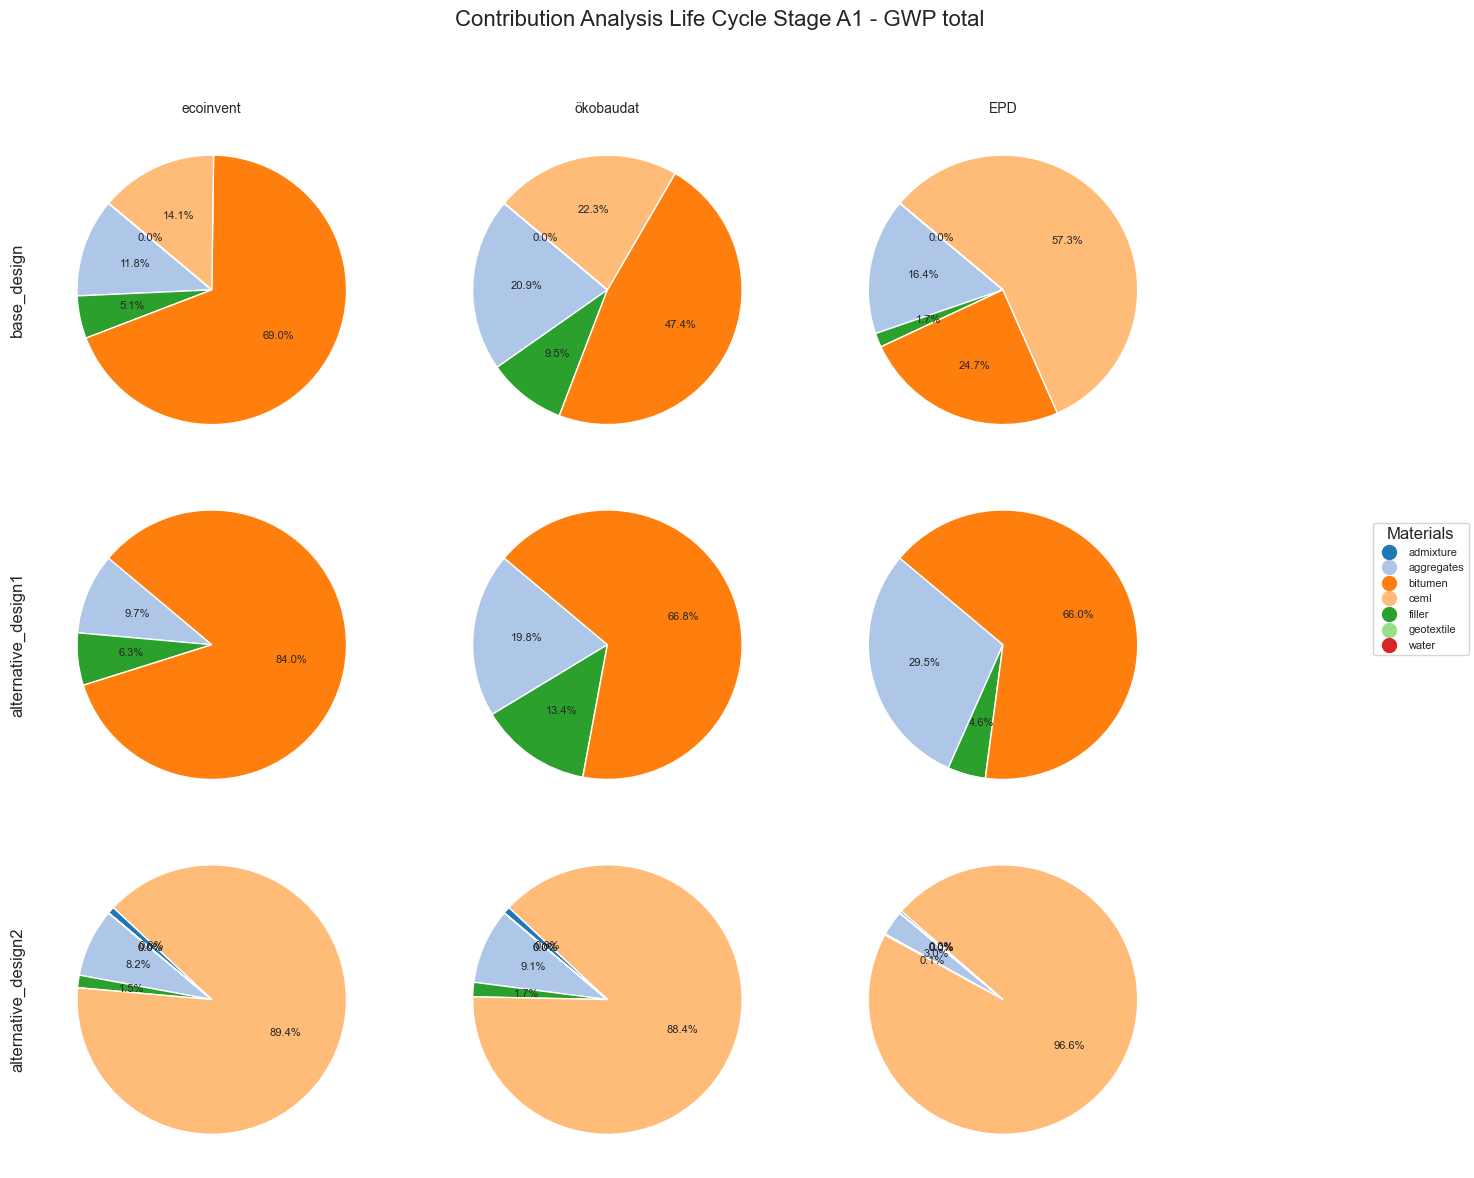

In [17]:
emission_factors_sets = {
    "ecoinvent": emission_factors_ecoinvent,
    "ökobaudat": emission_factors_national,
    "EPD": emission_factors_epd,
}

stat_results_tables = {
    "ecoinvent": stat_results_ecoinvent_table,
    "ökobaudat": stat_results_national_table,
    "EPD": stat_results_epd_table,
}

# Calculate normalized contributions
a1_contributions_multiple = calculate_normalized_a1_contributions_multiple_emission_factors(
    design_options, layers, emission_factors_sets, stat_results_tables
)

# Plot comparison of normalized contributions
plot_comparison_a1_contributions(a1_contributions_multiple)

### Uncertainty Contribution Analysis based on Stage A1 and COV

{'ecoinvent': {'base_design': {'aggregates': 0.11383344045620195, 'filler': 0.19842883055665875, 'bitumen': 92.54878683211642, 'cemI': 7.138950896864449, 'water': 6.259724512086639e-12}, 'alternative_design1': {'aggregates': 0.08252979263156698, 'filler': 0.21539676259649848, 'bitumen': 99.70207344477193}, 'alternative_design2': {'aggregates': 0.1684285201601994, 'filler': 0.12381073740664274, 'cemI': 96.52874913692551, 'admixture': 3.1790116054742024, 'water': 3.3443823070735826e-11, 'geotextile': 0.0}}, 'ökobaudat': {'base_design': {'aggregates': 0.360721541388568, 'filler': 1.5544182955661938, 'bitumen': 69.74774959270307, 'cemI': 28.337106832270077, 'water': 3.738072095091607e-06}, 'alternative_design1': {'aggregates': 0.3392568822633995, 'filler': 2.1888600494100414, 'bitumen': 97.47188306832655}, 'alternative_design2': {'aggregates': 0.13443407655989392, 'filler': 0.24429408741869427, 'cemI': 96.50933219124094, 'admixture': 3.1119346144109463, 'water': 5.0303695283218655e-06, 'ge

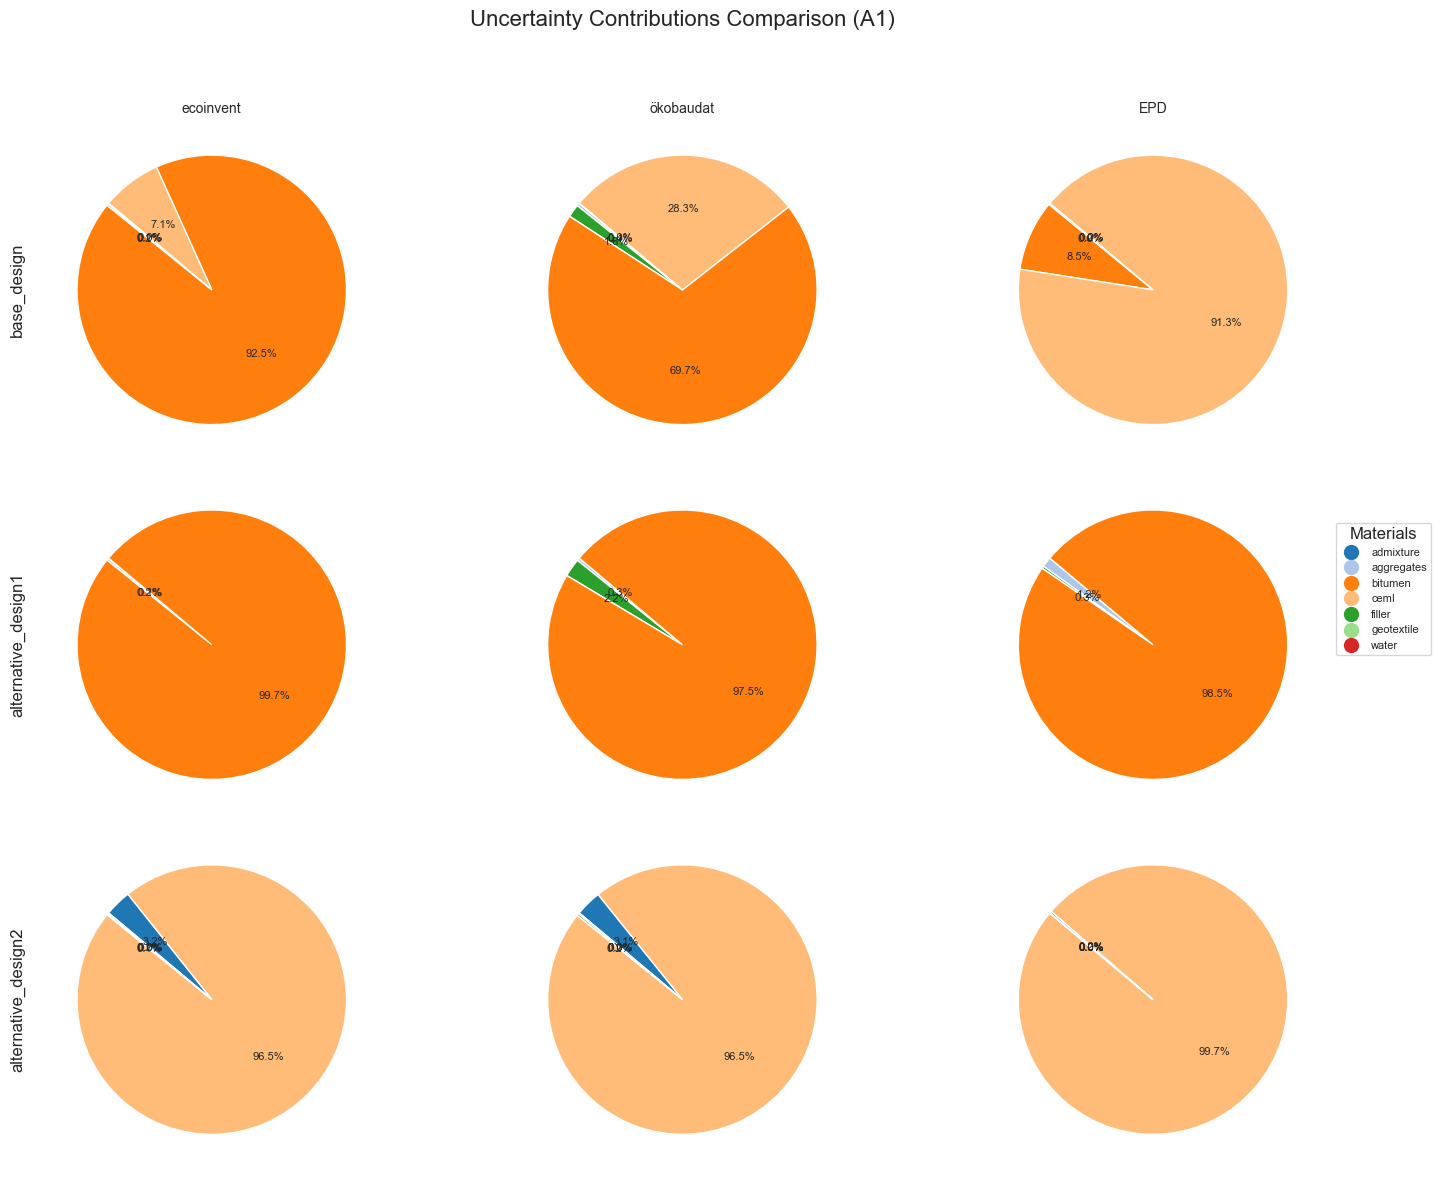

In [18]:
uncertainty_contributions_ecoinvent = calculate_uncertainty_contributions(
    design_options, layers, emission_factors_ecoinvent, stat_results_ecoinvent_table
)
uncertainty_contributions_national = calculate_uncertainty_contributions(
    design_options, layers, emission_factors_national, stat_results_national_table
)
uncertainty_contributions_epd = calculate_uncertainty_contributions(
    design_options, layers, emission_factors_epd, stat_results_epd_table
)

# Combine all contributions
uncertainty_contributions_multiple = {
    "ecoinvent": uncertainty_contributions_ecoinvent,
    "ökobaudat": uncertainty_contributions_national,
    "EPD": uncertainty_contributions_epd,
}

print(uncertainty_contributions_multiple)
# Plot comparison
plot_comparison_uncertainty_contributions(uncertainty_contributions_multiple)